# Project

# The Air Quality and COVID-19 Cases in King County, Washington

# **1. Obtain the dataset to be used**

## 1-1 Load and check the data

In [209]:
#Import the necessary library
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We obtained daily COVID-19 case numbers for the USA from **2020 to 2023 **through USAFACTS. Additionally, we collected daily air quality data(including CO, NO2,OZONE, PM2.5 PM10, SO2 and all AQI pollutants) for King County, Washington from EPA.gov. These parameters relate to the lung related diseases, including COVID 19.

In [210]:
#Load and check the data
df_Case = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/covid_confirmed_usafacts.csv")    #Dataset of daily COVID-19 daily cases
display(df_Case.head(5))
display(df_Case.info())
display(df_Case.describe())

countyFIPS            County Name State  StateFIPS  2020-01-22  2020-01-23  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           0           0   
2        1003        Baldwin County     AL          1           0           0   
3        1005        Barbour County     AL          1           0           0   
4        1007           Bibb County     AL          1           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2023-07-14  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...       19913   
2           0           0           0           0  ...       70521   
3           0           0           0           0  ...        7582   
4           0           0           0           0  ...        8149   

   2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  \
0           0           0           0           0           0           0   
1       19913       19913       19913       19913       19913       19913   
2       70521       70521       70521       70521       70521       70521   
3        7582        7582        7582        7582        7582        7582   
4        8149        8149        8149        8149        8149        8149   

   2023-07-21  2023-07-22  2023-07-23  
0           0           0           0  
1       19913       19913       19913  
2       70521       70521       70521  
3        7582        7582        7582  
4        8149        8149        8149  

[5 rows x 1269 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 1269 entries, countyFIPS to 2023-07-23
dtypes: int64(1267), object(2)
memory usage: 30.9+ MB


None

countyFIPS    StateFIPS   2020-01-22   2020-01-23   2020-01-24  \
count   3193.000000  3193.000000  3193.000000  3193.000000  3193.000000   
mean   29898.348262    30.259004     0.226433     0.229878     0.232070   
std    15515.884232    15.153897     6.899731     6.977750     7.031192   
min        0.000000     1.000000     0.000000     0.000000     0.000000   
25%    18101.000000    18.000000     0.000000     0.000000     0.000000   
50%    29125.000000    29.000000     0.000000     0.000000     0.000000   
75%    45055.000000    45.000000     0.000000     0.000000     0.000000   
max    56045.000000    56.000000   375.000000   379.000000   382.000000   

        2020-01-25   2020-01-26   2020-01-27   2020-01-28   2020-01-29  ...  \
count  3193.000000  3193.000000  3193.000000  3193.000000  3193.000000  ...   
mean      0.235202     0.237707     0.240839     0.242718     0.243971  ...   
std       7.075284     7.096643     7.160000     7.199078     7.220848  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max     384.000000   385.000000   388.000000   390.000000   391.000000  ...   

         2023-07-14    2023-07-15    2023-07-16    2023-07-17    2023-07-18  \
count  3.193000e+03  3.193000e+03  3.193000e+03  3.193000e+03  3.193000e+03   
mean   3.118818e+04  3.118844e+04  3.118858e+04  3.118874e+04  3.118975e+04   
std    1.062492e+05  1.062517e+05  1.062530e+05  1.062543e+05  1.062558e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.946000e+03  2.946000e+03  2.946000e+03  2.946000e+03  2.946000e+03   
50%    7.464000e+03  7.464000e+03  7.464000e+03  7.464000e+03  7.464000e+03   
75%    2.027200e+04  2.027200e+04  2.027200e+04  2.027200e+04  2.027200e+04   
max    3.533727e+06  3.533901e+06  3.533991e+06  3.534073e+06  3.534088e+06   

         2023-07-19    2023-07-20    2023-07-21    2023-07-22    2023-07-23  
count  3.193000e+03  3.193000e+03  3.193000e+03  3.193000e+03  3.193000e+03  
mean   3.119131e+04  3.119197e+04  3.119221e+04  3.119221e+04  3.119221e+04  
std    1.062615e+05  1.062632e+05  1.062635e+05  1.062635e+05  1.062635e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    2.946000e+03  2.946000e+03  2.946000e+03  2.946000e+03  2.946000e+03  
50%    7.464000e+03  7.464000e+03  7.464000e+03  7.464000e+03  7.464000e+03  
75%    2.027200e+04  2.027200e+04  2.027200e+04  2.027200e+04  2.027200e+04  
max    3.534088e+06  3.534088e+06  3.534088e+06  3.534088e+06  3.534088e+06  

[8 rows x 1267 columns]

In [211]:
df_CO_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/CO/ad_viz_plotval_data CO KING 2020.csv")      #Dataset of daily CO report for King county at year 2020
df_CO_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/CO/ad_viz_plotval_data CO KING 2021.csv")      #Dataset of daily CO report for King county at year 2021
df_CO_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/CO/ad_viz_plotval_data CO KING 2022.csv")      #Dataset of daily CO report for King county at year 2022
df_CO_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/CO/ad_viz_plotval_data CO king 2023.csv")      #Dataset of daily CO report for King county at year 2023
df_CO = pd.concat([df_CO_2020, df_CO_2021, df_CO_2022,df_CO_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_CO.head(5))
display(df_CO.tail(5))
display(df_CO.info())
display(df_CO.describe())

# POC: Parameter Occurrence Code; OBS_COUNT:Observation count; AQI:Air Quality Index

Date Source    Site ID  POC  Daily Max 8-hour CO Concentration UNITS  \
0  01/01/2020    AQS  530330030    1                                0.3   ppm   
1  01/02/2020    AQS  530330030    1                                0.4   ppm   
2  01/03/2020    AQS  530330030    1                                0.8   ppm   
3  01/04/2020    AQS  530330030    1                                0.4   ppm   
4  01/05/2020    AQS  530330030    1                                0.4   ppm   

   DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
0                3  Seattle-10th & Weller               18              75.0   
1                5  Seattle-10th & Weller               24             100.0   
2                9  Seattle-10th & Weller               24             100.0   
3                5  Seattle-10th & Weller               24             100.0   
4                5  Seattle-10th & Weller               24             100.0   

   AQS_PARAMETER_CODE AQS_PARAMETER_DESC  CBSA_CODE  \
0               42101    Carbon monoxide      42660   
1               42101    Carbon monoxide      42660   
2               42101    Carbon monoxide      42660   
3               42101    Carbon monoxide      42660   
4               42101    Carbon monoxide      42660   

                     CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
0  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
3  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
4  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

   SITE_LATITUDE  SITE_LONGITUDE  
0      47.597222     -122.319722  
1      47.597222     -122.319722  
2      47.597222     -122.319722  
3      47.597222     -122.319722  
4      47.597222     -122.319722

Date Source    Site ID  POC  Daily Max 8-hour CO Concentration  \
2162  04/27/2023    AQS  530330080    2                                0.2   
2163  04/28/2023    AQS  530330080    2                                0.2   
2164  04/29/2023    AQS  530330080    2                                0.2   
2165  04/30/2023    AQS  530330080    2                                0.2   
2166  05/01/2023    AQS  530330080    2                                0.1   

     UNITS  DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  \
2162   ppm                2  SEATTLE - BEACON HILL               24   
2163   ppm                2  SEATTLE - BEACON HILL               24   
2164   ppm                2  SEATTLE - BEACON HILL               24   
2165   ppm                2  SEATTLE - BEACON HILL               24   
2166   ppm                1  SEATTLE - BEACON HILL                1   

      PERCENT_COMPLETE  AQS_PARAMETER_CODE AQS_PARAMETER_DESC  CBSA_CODE  \
2162             100.0               42101    Carbon monoxide      42660   
2163             100.0               42101    Carbon monoxide      42660   
2164             100.0               42101    Carbon monoxide      42660   
2165             100.0               42101    Carbon monoxide      42660   
2166               4.0               42101    Carbon monoxide      42660   

                        CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
2162  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2163  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2164  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2165  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2166  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

      SITE_LATITUDE  SITE_LONGITUDE  
2162      47.568236     -122.308628  
2163      47.568236     -122.308628  
2164      47.568236     -122.308628  
2165      47.568236     -122.308628  
2166      47.568236     -122.308628

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               2167 non-null   object 
 1   Source                             2167 non-null   object 
 2   Site ID                            2167 non-null   int64  
 3   POC                                2167 non-null   int64  
 4   Daily Max 8-hour CO Concentration  2167 non-null   float64
 5   UNITS                              2167 non-null   object 
 6   DAILY_AQI_VALUE                    2167 non-null   int64  
 7   Site Name                          2167 non-null   object 
 8   DAILY_OBS_COUNT                    2167 non-null   int64  
 9   PERCENT_COMPLETE                   2167 non-null   float64
 10  AQS_PARAMETER_CODE                 2167 non-null   int64  
 11  AQS_PARAMETER_DESC                 2167 non-null   objec

None

Site ID          POC  Daily Max 8-hour CO Concentration  \
count  2.167000e+03  2167.000000                        2167.000000   
mean   5.303301e+08     1.531149                           0.362483   
std    2.495720e+01     0.499144                           0.185260   
min    5.303300e+08     1.000000                           0.100000   
25%    5.303300e+08     1.000000                           0.200000   
50%    5.303301e+08     2.000000                           0.300000   
75%    5.303301e+08     2.000000                           0.500000   
max    5.303301e+08     2.000000                           1.700000   

       DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
count      2167.000000       2167.00000       2167.000000              2167.0   
mean          4.091371         23.50300         97.934933             42101.0   
std           2.288506          2.67885         11.135028                 0.0   
min           1.000000          1.00000          4.000000             42101.0   
25%           2.000000         24.00000        100.000000             42101.0   
50%           3.000000         24.00000        100.000000             42101.0   
75%           6.000000         24.00000        100.000000             42101.0   
max          19.000000         24.00000        100.000000             42101.0   

       CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
count     2167.0      2167.0       2167.0    2167.000000     2167.000000  
mean     42660.0        53.0         33.0      47.581826     -122.313829  
std          0.0         0.0          0.0       0.014468        0.005538  
min      42660.0        53.0         33.0      47.568236     -122.319722  
25%      42660.0        53.0         33.0      47.568236     -122.319722  
50%      42660.0        53.0         33.0      47.568236     -122.308628  
75%      42660.0        53.0         33.0      47.597222     -122.308628  
max      42660.0        53.0         33.0      47.597222     -122.308628

In [212]:
# Extract usful information and store in a new data frame. 
# Use the colume:"Date","Daily Max 8-hour CO Concentration","DAILY_AQI_VALUE"
df_CO_ext = df_CO[["Date","Daily Max 8-hour CO Concentration","DAILY_AQI_VALUE"]]

# Rename the column "DAILY_AQI_VALUE" to "DAILY_AQI_VALUE_CO"
df_CO_ext.rename(columns={"DAILY_AQI_VALUE": "DAILY_AQI_VALUE_CO"}, inplace=True)

display(df_CO_ext.head(3))
display(df_CO_ext.shape)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3729260618.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO
0  01/01/2020                                0.3                   3
1  01/02/2020                                0.4                   5
2  01/03/2020                                0.8                   9

(2167, 3)

In [213]:
df_NO2_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/NO2/ad_viz_plotval_data NO2 KING 2020.csv")      #Dataset of daily NO2 report for King county at year 2020
df_NO2_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/NO2/ad_viz_plotval_data NO2 KING 2021.csv")      #Dataset of daily NO2 report for King county at year 2021
df_NO2_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/NO2/ad_viz_plotval_data NO2 KING 2022.csv")      #Dataset of daily NO2 report for King county at year 2022
df_NO2_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/NO2/ad_viz_plotval_data NO2 KING 2023.csv")      #Dataset of daily NO2 report for King county at year 2023
df_NO2 = pd.concat([df_NO2_2020, df_NO2_2021, df_NO2_2022,df_NO2_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_NO2.head(5))
display(df_NO2.tail(5))
display(df_NO2.info())
display(df_NO2.describe())

Date Source    Site ID  POC  Daily Max 1-hour NO2 Concentration  \
0  01/01/2020    AQS  530330030    1                                30.5   
1  01/02/2020    AQS  530330030    1                                46.8   
2  01/03/2020    AQS  530330030    1                                45.3   
3  01/04/2020    AQS  530330030    1                                17.9   
4  01/05/2020    AQS  530330030    1                                15.3   

  UNITS  DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  \
0   ppb               28  Seattle-10th & Weller               23   
1   ppb               43  Seattle-10th & Weller               23   
2   ppb               42  Seattle-10th & Weller               24   
3   ppb               16  Seattle-10th & Weller               23   
4   ppb               14  Seattle-10th & Weller               23   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE      AQS_PARAMETER_DESC  CBSA_CODE  \
0              96.0               42602  Nitrogen dioxide (NO2)      42660   
1              96.0               42602  Nitrogen dioxide (NO2)      42660   
2             100.0               42602  Nitrogen dioxide (NO2)      42660   
3              96.0               42602  Nitrogen dioxide (NO2)      42660   
4              96.0               42602  Nitrogen dioxide (NO2)      42660   

                     CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
0  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
3  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
4  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

   SITE_LATITUDE  SITE_LONGITUDE  
0      47.597222     -122.319722  
1      47.597222     -122.319722  
2      47.597222     -122.319722  
3      47.597222     -122.319722  
4      47.597222     -122.319722

Date Source    Site ID  POC  Daily Max 1-hour NO2 Concentration  \
2376  04/26/2023    AQS  530330080    1                                32.9   
2377  04/27/2023    AQS  530330080    1                                18.2   
2378  04/28/2023    AQS  530330080    1                                23.9   
2379  04/29/2023    AQS  530330080    1                                20.0   
2380  04/30/2023    AQS  530330080    1                                10.9   

     UNITS  DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  \
2376   ppb               30  SEATTLE - BEACON HILL               24   
2377   ppb               17  SEATTLE - BEACON HILL               24   
2378   ppb               22  SEATTLE - BEACON HILL               23   
2379   ppb               19  SEATTLE - BEACON HILL               24   
2380   ppb                9  SEATTLE - BEACON HILL               22   

      PERCENT_COMPLETE  AQS_PARAMETER_CODE      AQS_PARAMETER_DESC  CBSA_CODE  \
2376             100.0               42602  Nitrogen dioxide (NO2)      42660   
2377             100.0               42602  Nitrogen dioxide (NO2)      42660   
2378              96.0               42602  Nitrogen dioxide (NO2)      42660   
2379             100.0               42602  Nitrogen dioxide (NO2)      42660   
2380              92.0               42602  Nitrogen dioxide (NO2)      42660   

                        CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
2376  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2377  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2378  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2379  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2380  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

      SITE_LATITUDE  SITE_LONGITUDE  
2376      47.568236     -122.308628  
2377      47.568236     -122.308628  
2378      47.568236     -122.308628  
2379      47.568236     -122.308628  
2380      47.568236     -122.308628

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                2381 non-null   object 
 1   Source                              2381 non-null   object 
 2   Site ID                             2381 non-null   int64  
 3   POC                                 2381 non-null   int64  
 4   Daily Max 1-hour NO2 Concentration  2381 non-null   float64
 5   UNITS                               2381 non-null   object 
 6   DAILY_AQI_VALUE                     2381 non-null   int64  
 7   Site Name                           2381 non-null   object 
 8   DAILY_OBS_COUNT                     2381 non-null   int64  
 9   PERCENT_COMPLETE                    2381 non-null   float64
 10  AQS_PARAMETER_CODE                  2381 non-null   int64  
 11  AQS_PARAMETER_DESC                  2381 no

None

Site ID     POC  Daily Max 1-hour NO2 Concentration  \
count  2.381000e+03  2381.0                         2381.000000   
mean   5.303301e+08     1.0                           24.547375   
std    2.500446e+01     0.0                           10.226755   
min    5.303300e+08     1.0                            3.300000   
25%    5.303300e+08     1.0                           17.600000   
50%    5.303301e+08     1.0                           24.000000   
75%    5.303301e+08     1.0                           30.700000   
max    5.303301e+08     1.0                           78.500000   

       DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
count      2381.000000      2381.000000       2381.000000              2381.0   
mean         22.735825        23.210836         96.831163             42602.0   
std           9.721691         0.802350          3.267367                 0.0   
min           3.000000        18.000000         75.000000             42602.0   
25%          16.000000        23.000000         96.000000             42602.0   
50%          23.000000        23.000000         96.000000             42602.0   
75%          28.000000        24.000000        100.000000             42602.0   
max          77.000000        24.000000        100.000000             42602.0   

       CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
count     2381.0      2381.0       2381.0    2381.000000     2381.000000  
mean     42660.0        53.0         33.0      47.582613     -122.314131  
std          0.0         0.0          0.0       0.014496        0.005548  
min      42660.0        53.0         33.0      47.568236     -122.319722  
25%      42660.0        53.0         33.0      47.568236     -122.319722  
50%      42660.0        53.0         33.0      47.568236     -122.308628  
75%      42660.0        53.0         33.0      47.597222     -122.308628  
max      42660.0        53.0         33.0      47.597222     -122.308628

In [214]:
# Extract usful information and store in a new data frame. 
# Use the colume:"Date","Daily Max 1-hour NO2 Concentration","DAILY_AQI_VALUE"
df_NO2_ext = df_NO2[["Date","Daily Max 1-hour NO2 Concentration","DAILY_AQI_VALUE"]]

# Rename the column "DAILY_AQI_VALUE" to "DAILY_AQI_VALUE_CO"
df_NO2_ext.rename(columns={"DAILY_AQI_VALUE": "DAILY_AQI_VALUE_NO2"}, inplace=True)

display(df_NO2_ext.head(3))
display(df_NO2_ext.shape)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/239163507.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2
0  01/01/2020                                30.5                   28
1  01/02/2020                                46.8                   43
2  01/03/2020                                45.3                   42

(2381, 3)

In [215]:
df_ozone_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/OZONE/ad_viz_plotval_data OZONE KING 2020.csv")      #Dataset of daily ozone report for King county at year 2020
df_ozone_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/OZONE/ad_viz_plotval_data OZONE KING 2021.csv")      #Dataset of daily ozone report for King county at year 2021
df_ozone_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/OZONE/ad_viz_plotval_data OZONE KING 2022.csv")      #Dataset of daily ozone report for King county at year 2022
df_ozone_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/OZONE/ad_viz_plotval_data OZONE KING 2023.csv")      #Dataset of daily ozone report for King county at year 2023
df_ozone = pd.concat([df_ozone_2020, df_ozone_2021, df_ozone_2022,df_ozone_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_ozone.head(5))
display(df_ozone.tail(5))
display(df_ozone.info())
display(df_ozone.describe())

Date Source    Site ID  POC  Daily Max 8-hour Ozone Concentration  \
0  05/16/2020    AQS  530330010    1                                 0.021   
1  05/17/2020    AQS  530330010    1                                 0.038   
2  05/18/2020    AQS  530330010    1                                 0.035   
3  05/19/2020    AQS  530330010    1                                 0.025   
4  05/20/2020    AQS  530330010    1                                 0.033   

  UNITS  DAILY_AQI_VALUE                                          Site Name  \
0   ppm               19  ISSAQUAH -  LAKE SAMMAMISH (Wiithin Lake Samma...   
1   ppm               35  ISSAQUAH -  LAKE SAMMAMISH (Wiithin Lake Samma...   
2   ppm               32  ISSAQUAH -  LAKE SAMMAMISH (Wiithin Lake Samma...   
3   ppm               23  ISSAQUAH -  LAKE SAMMAMISH (Wiithin Lake Samma...   
4   ppm               31  ISSAQUAH -  LAKE SAMMAMISH (Wiithin Lake Samma...   

   DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE AQS_PARAMETER_DESC  \
0               17             100.0               44201              Ozone   
1               17             100.0               44201              Ozone   
2               17             100.0               44201              Ozone   
3               17             100.0               44201              Ozone   
4               17             100.0               44201              Ozone   

   CBSA_CODE                    CBSA_NAME  STATE_CODE       STATE  \
0      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
1      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
2      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
3      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
4      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   

   COUNTY_CODE COUNTY  SITE_LATITUDE  SITE_LONGITUDE  
0           33   King        47.5525     -122.064722  
1           33   King        47.5525     -122.064722  
2           33   King        47.5525     -122.064722  
3           33   King        47.5525     -122.064722  
4           33   King        47.5525     -122.064722

Date  Source    Site ID  POC  \
2848  08/10/2023  AirNow  530330080    1   
2849  08/11/2023  AirNow  530330080    1   
2850  08/12/2023  AirNow  530330080    1   
2851  08/13/2023  AirNow  530330080    1   
2852  08/14/2023  AirNow  530330080    1   

      Daily Max 8-hour Ozone Concentration UNITS  DAILY_AQI_VALUE  \
2848                                 0.030   ppm               28   
2849                                 0.034   ppm               31   
2850                                 0.033   ppm               31   
2851                                 0.040   ppm               37   
2852                                 0.033   ppm               31   

                  Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
2848  SEATTLE - BEACON HILL               24             100.0   
2849  SEATTLE - BEACON HILL               24             100.0   
2850  SEATTLE - BEACON HILL               24             100.0   
2851  SEATTLE - BEACON HILL               24             100.0   
2852  SEATTLE - BEACON HILL               20              83.0   

      AQS_PARAMETER_CODE AQS_PARAMETER_DESC  CBSA_CODE  \
2848               44201              Ozone      42660   
2849               44201              Ozone      42660   
2850               44201              Ozone      42660   
2851               44201              Ozone      42660   
2852               44201              Ozone      42660   

                        CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
2848  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2849  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2850  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2851  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2852  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

      SITE_LATITUDE  SITE_LONGITUDE  
2848      47.568236     -122.308628  
2849      47.568236     -122.308628  
2850      47.568236     -122.308628  
2851      47.568236     -122.308628  
2852      47.568236     -122.308628

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2853 non-null   object 
 1   Source                                2853 non-null   object 
 2   Site ID                               2853 non-null   int64  
 3   POC                                   2853 non-null   int64  
 4   Daily Max 8-hour Ozone Concentration  2853 non-null   float64
 5   UNITS                                 2853 non-null   object 
 6   DAILY_AQI_VALUE                       2853 non-null   int64  
 7   Site Name                             2853 non-null   object 
 8   DAILY_OBS_COUNT                       2853 non-null   int64  
 9   PERCENT_COMPLETE                      2853 non-null   float64
 10  AQS_PARAMETER_CODE                    2853 non-null   int64  
 11  AQS_PARAMETER_DES

None

Site ID     POC  Daily Max 8-hour Ozone Concentration  \
count  2.853000e+03  2853.0                           2853.000000   
mean   5.303300e+08     1.0                              0.032998   
std    3.135801e+01     0.0                              0.010786   
min    5.303300e+08     1.0                              0.001000   
25%    5.303300e+08     1.0                              0.026000   
50%    5.303300e+08     1.0                              0.033000   
75%    5.303301e+08     1.0                              0.039000   
max    5.303301e+08     1.0                              0.096000   

       DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
count      2853.000000      2853.000000       2853.000000              2853.0   
mean         31.190676        18.104802         99.724851             44201.0   
std          12.970517         2.613058          2.288532                 0.0   
min           1.000000        13.000000         75.000000             44201.0   
25%          24.000000        17.000000        100.000000             44201.0   
50%          31.000000        17.000000        100.000000             44201.0   
75%          36.000000        17.000000        100.000000             44201.0   
max         177.000000        24.000000        100.000000             44201.0   

       CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
count     2853.0      2853.0       2853.0    2853.000000     2853.000000  
mean     42660.0        53.0         33.0      47.462486     -122.089640  
std          0.0         0.0          0.0       0.166037        0.216387  
min      42660.0        53.0         33.0      47.141100     -122.308628  
25%      42660.0        53.0         33.0      47.490220     -122.308628  
50%      42660.0        53.0         33.0      47.552500     -122.064722  
75%      42660.0        53.0         33.0      47.568236     -121.937900  
max      42660.0        53.0         33.0      47.568236     -121.772780

In [216]:
# Extract usful information and store in a new data frame. 
# Use the colume:"Date","Daily Max 8-hour Ozone Concentration","DAILY_AQI_VALUE"
df_ozone_ext = df_ozone[["Date","Daily Max 8-hour Ozone Concentration","DAILY_AQI_VALUE"]]

# Rename the column "DAILY_AQI_VALUE" to "DAILY_AQI_VALUE_CO"
df_ozone_ext.rename(columns={"DAILY_AQI_VALUE": "DAILY_AQI_VALUE_ozone"}, inplace=True)

display(df_ozone_ext.head(3))
display(df_ozone_ext.shape)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/2301053124.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone
0  05/16/2020                                 0.021                     19
1  05/17/2020                                 0.038                     35
2  05/18/2020                                 0.035                     32

(2853, 3)

In [217]:
df_PM25_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM2.5/ad_viz_plotval_data PM2.5 KING 2020.csv")      #Dataset of daily PM2.5 report for King county at year 2020
df_PM25_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM2.5/ad_viz_plotval_data PM2.5 KING 2021.csv")      #Dataset of daily PM2.5 report for King county at year 2021
df_PM25_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM2.5/ad_viz_plotval_data PM2.5 KING 2022.csv")      #Dataset of daily PM2.5 report for King county at year 2022
df_PM25_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM2.5/ad_viz_plotval_data PM25 KING 2023.csv")      #Dataset of daily PM2.5 report for King county at year 2023
df_PM25 = pd.concat([df_PM25_2020, df_PM25_2021, df_PM25_2022,df_PM25_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_PM25.head(5))
display(df_PM25.tail(5))
display(df_PM25.info())
display(df_PM25.describe())

Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0  01/01/2020    AQS  530330017    4                             0.9   
1  01/02/2020    AQS  530330017    4                             1.4   
2  01/03/2020    AQS  530330017    4                             0.7   
3  01/04/2020    AQS  530330017    4                             1.2   
4  01/05/2020    AQS  530330017    4                             0.8   

      UNITS  DAILY_AQI_VALUE                    Site Name  DAILY_OBS_COUNT  \
0  ug/m3 LC                4  NORTH BEND - NORTH BEND WAY                1   
1  ug/m3 LC                6  NORTH BEND - NORTH BEND WAY                1   
2  ug/m3 LC                3  NORTH BEND - NORTH BEND WAY                1   
3  ug/m3 LC                5  NORTH BEND - NORTH BEND WAY                1   
4  ug/m3 LC                3  NORTH BEND - NORTH BEND WAY                1   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
0             100.0               88502   
1             100.0               88502   
2             100.0               88502   
3             100.0               88502   
4             100.0               88502   

                       AQS_PARAMETER_DESC  CBSA_CODE  \
0  Acceptable PM2.5 AQI & Speciation Mass      42660   
1  Acceptable PM2.5 AQI & Speciation Mass      42660   
2  Acceptable PM2.5 AQI & Speciation Mass      42660   
3  Acceptable PM2.5 AQI & Speciation Mass      42660   
4  Acceptable PM2.5 AQI & Speciation Mass      42660   

                     CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
0  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
3  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
4  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

   SITE_LATITUDE  SITE_LONGITUDE  
0       47.49022      -121.77278  
1       47.49022      -121.77278  
2       47.49022      -121.77278  
3       47.49022      -121.77278  
4       47.49022      -121.77278

Date  Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
15435  06/13/2023  AirNow  530332004    5                             9.1   
15436  06/14/2023  AirNow  530332004    5                             9.1   
15437  06/15/2023  AirNow  530332004    5                             9.8   
15438  06/16/2023  AirNow  530332004    5                             7.4   
15439  06/17/2023  AirNow  530332004    5                             3.9   

          UNITS  DAILY_AQI_VALUE               Site Name  DAILY_OBS_COUNT  \
15435  ug/m3 LC               38  KENT - JAMES & CENTRAL                1   
15436  ug/m3 LC               38  KENT - JAMES & CENTRAL                1   
15437  ug/m3 LC               41  KENT - JAMES & CENTRAL                1   
15438  ug/m3 LC               31  KENT - JAMES & CENTRAL                1   
15439  ug/m3 LC               16  KENT - JAMES & CENTRAL                1   

       PERCENT_COMPLETE  AQS_PARAMETER_CODE        AQS_PARAMETER_DESC  \
15435             100.0               88101  PM2.5 - Local Conditions   
15436             100.0               88101  PM2.5 - Local Conditions   
15437             100.0               88101  PM2.5 - Local Conditions   
15438             100.0               88101  PM2.5 - Local Conditions   
15439             100.0               88101  PM2.5 - Local Conditions   

       CBSA_CODE                    CBSA_NAME  STATE_CODE       STATE  \
15435      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
15436      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
15437      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
15438      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   
15439      42660  Seattle-Tacoma-Bellevue, WA          53  Washington   

       COUNTY_CODE COUNTY  SITE_LATITUDE  SITE_LONGITUDE  
15435           33   King      47.386111     -122.230278  
15436           33   King      47.386111     -122.230278  
15437           33   King      47.386111     -122.230278  
15438           33   King      47.386111     -122.230278  
15439           33   King      47.386111     -122.230278

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15440 entries, 0 to 15439
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            15440 non-null  object 
 1   Source                          15440 non-null  object 
 2   Site ID                         15440 non-null  int64  
 3   POC                             15440 non-null  int64  
 4   Daily Mean PM2.5 Concentration  15440 non-null  float64
 5   UNITS                           15440 non-null  object 
 6   DAILY_AQI_VALUE                 15440 non-null  int64  
 7   Site Name                       14584 non-null  object 
 8   DAILY_OBS_COUNT                 15440 non-null  int64  
 9   PERCENT_COMPLETE                15440 non-null  float64
 10  AQS_PARAMETER_CODE              15440 non-null  int64  
 11  AQS_PARAMETER_DESC              15440 non-null  object 
 12  CBSA_CODE                       

None

Site ID           POC  Daily Mean PM2.5 Concentration  \
count  1.544000e+04  15440.000000                    15440.000000   
mean   5.303304e+08      4.300777                        6.845162   
std    6.509866e+02      0.750205                       10.821636   
min    5.303300e+08      1.000000                       -1.000000   
25%    5.303300e+08      4.000000                        3.300000   
50%    5.303301e+08      4.000000                        5.100000   
75%    5.303301e+08      5.000000                        7.400000   
max    5.303320e+08      5.000000                      224.700000   

       DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
count     15440.000000          15440.0           15440.0        15440.000000   
mean         25.509132              1.0             100.0        88339.444365   
std          21.120682              0.0               0.0          196.883178   
min           0.000000              1.0             100.0        88101.000000   
25%          14.000000              1.0             100.0        88101.000000   
50%          21.000000              1.0             100.0        88502.000000   
75%          31.000000              1.0             100.0        88502.000000   
max         275.000000              1.0             100.0        88502.000000   

       CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
count    15440.0     15440.0      15440.0   15440.000000    15440.000000  
mean     42660.0        53.0         33.0      47.520047     -122.223621  
std          0.0         0.0          0.0       0.123507        0.156842  
min      42660.0        53.0         33.0      47.141100     -122.338265  
25%      42660.0        53.0         33.0      47.490220     -122.319722  
50%      42660.0        53.0         33.0      47.530910     -122.278385  
75%      42660.0        53.0         33.0      47.597222     -122.223300  
max      42660.0        53.0         33.0      47.755000     -121.772780

In [218]:
# Extract usful information and store in a new data frame. 
# Use the colume:"Date","Daily Mean PM2.5 Concentration","DAILY_AQI_VALUE"
df_PM25_ext = df_PM25[["Date","Daily Mean PM2.5 Concentration","DAILY_AQI_VALUE"]]

# Rename the column "DAILY_AQI_VALUE" to "DAILY_AQI_VALUE_CO"
df_PM25_ext.rename(columns={"DAILY_AQI_VALUE": "DAILY_AQI_VALUE_PM2.5"}, inplace=True)

display(df_PM25_ext.head(3))
display(df_PM25_ext.shape)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3002621254.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5
0  01/01/2020                             0.9                      4
1  01/02/2020                             1.4                      6
2  01/03/2020                             0.7                      3

(15440, 3)

In [219]:
df_PM10_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM10/ad_viz_plotval_data PM10 KING 2020.csv")      #Dataset of daily PM10 report for King county at year 2020
df_PM10_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM10/ad_viz_plotval_data PM10 KING 2021.csv")      #Dataset of daily PM10 report for King county at year 2021
df_PM10_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM10/ad_viz_plotval_data PM10 KING 2022.csv")      #Dataset of daily PM10 report for King county at year 2022
df_PM10_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/PM10/ad_viz_plotval_data PM10 KING 2023.csv")      #Dataset of daily PM10 report for King county at year 2023
df_PM10 = pd.concat([df_PM10_2020, df_PM10_2021, df_PM10_2022,df_PM10_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_PM10.head(5))
display(df_PM10.tail(5))
display(df_PM10.info())
display(df_PM10.describe())

Date Source    Site ID  POC  Daily Mean PM10 Concentration     UNITS  \
0  01/01/2020    AQS  530330080    2                              4  ug/m3 SC   
1  01/04/2020    AQS  530330080    2                              7  ug/m3 SC   
2  01/07/2020    AQS  530330080    2                              2  ug/m3 SC   
3  01/10/2020    AQS  530330080    2                              2  ug/m3 SC   
4  01/13/2020    AQS  530330080    2                              7  ug/m3 SC   

   DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
0                4  SEATTLE - BEACON HILL                1             100.0   
1                6  SEATTLE - BEACON HILL                1             100.0   
2                2  SEATTLE - BEACON HILL                1             100.0   
3                2  SEATTLE - BEACON HILL                1             100.0   
4                6  SEATTLE - BEACON HILL                1             100.0   

   AQS_PARAMETER_CODE     AQS_PARAMETER_DESC  CBSA_CODE  \
0               81102  PM10 Total 0-10um STP      42660   
1               81102  PM10 Total 0-10um STP      42660   
2               81102  PM10 Total 0-10um STP      42660   
3               81102  PM10 Total 0-10um STP      42660   
4               81102  PM10 Total 0-10um STP      42660   

                     CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
0  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
3  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
4  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

   SITE_LATITUDE  SITE_LONGITUDE  
0      47.568236     -122.308628  
1      47.568236     -122.308628  
2      47.568236     -122.308628  
3      47.568236     -122.308628  
4      47.568236     -122.308628

Date Source    Site ID  POC  Daily Mean PM10 Concentration  \
253  03/19/2023    AQS  530330080    2                              0   
254  03/22/2023    AQS  530330080    2                             11   
255  03/25/2023    AQS  530330080    2                              5   
256  03/28/2023    AQS  530330080    2                              5   
257  03/31/2023    AQS  530330080    2                              4   

        UNITS  DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  \
253  ug/m3 SC                0  SEATTLE - BEACON HILL                1   
254  ug/m3 SC               10  SEATTLE - BEACON HILL                1   
255  ug/m3 SC                5  SEATTLE - BEACON HILL                1   
256  ug/m3 SC                5  SEATTLE - BEACON HILL                1   
257  ug/m3 SC                4  SEATTLE - BEACON HILL                1   

     PERCENT_COMPLETE  AQS_PARAMETER_CODE     AQS_PARAMETER_DESC  CBSA_CODE  \
253             100.0               81102  PM10 Total 0-10um STP      42660   
254             100.0               81102  PM10 Total 0-10um STP      42660   
255             100.0               81102  PM10 Total 0-10um STP      42660   
256             100.0               81102  PM10 Total 0-10um STP      42660   
257             100.0               81102  PM10 Total 0-10um STP      42660   

                       CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
253  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
254  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
255  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
256  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
257  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

     SITE_LATITUDE  SITE_LONGITUDE  
253      47.568236     -122.308628  
254      47.568236     -122.308628  
255      47.568236     -122.308628  
256      47.568236     -122.308628  
257      47.568236     -122.308628

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           258 non-null    object 
 1   Source                         258 non-null    object 
 2   Site ID                        258 non-null    int64  
 3   POC                            258 non-null    int64  
 4   Daily Mean PM10 Concentration  258 non-null    int64  
 5   UNITS                          258 non-null    object 
 6   DAILY_AQI_VALUE                258 non-null    int64  
 7   Site Name                      258 non-null    object 
 8   DAILY_OBS_COUNT                258 non-null    int64  
 9   PERCENT_COMPLETE               258 non-null    float64
 10  AQS_PARAMETER_CODE             258 non-null    int64  
 11  AQS_PARAMETER_DESC             258 non-null    object 
 12  CBSA_CODE                      258 non-null    int

None

Site ID    POC  Daily Mean PM10 Concentration  DAILY_AQI_VALUE  \
count        258.0  258.0                     258.000000       258.000000   
mean   530330080.0    2.0                       8.616279         7.953488   
std            0.0    0.0                       5.885090         5.385324   
min    530330080.0    2.0                       0.000000         0.000000   
25%    530330080.0    2.0                       5.000000         5.000000   
50%    530330080.0    2.0                       8.000000         7.000000   
75%    530330080.0    2.0                      11.000000        10.000000   
max    530330080.0    2.0                      46.000000        43.000000   

       DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  CBSA_CODE  \
count            258.0             258.0               258.0      258.0   
mean               1.0             100.0             81102.0    42660.0   
std                0.0               0.0                 0.0        0.0   
min                1.0             100.0             81102.0    42660.0   
25%                1.0             100.0             81102.0    42660.0   
50%                1.0             100.0             81102.0    42660.0   
75%                1.0             100.0             81102.0    42660.0   
max                1.0             100.0             81102.0    42660.0   

       STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
count       258.0        258.0   2.580000e+02    2.580000e+02  
mean         53.0         33.0   4.756824e+01   -1.223086e+02  
std           0.0          0.0   2.420541e-13    4.129158e-13  
min          53.0         33.0   4.756824e+01   -1.223086e+02  
25%          53.0         33.0   4.756824e+01   -1.223086e+02  
50%          53.0         33.0   4.756824e+01   -1.223086e+02  
75%          53.0         33.0   4.756824e+01   -1.223086e+02  
max          53.0         33.0   4.756824e+01   -1.223086e+02

In [220]:
# Extract usful information and store in a new data frame. 
# Use the colume:"Date","Daily Mean PM10 Concentration","DAILY_AQI_VALUE"
df_PM10_ext = df_PM10[["Date","Daily Mean PM10 Concentration","DAILY_AQI_VALUE"]]

# Rename the column "DAILY_AQI_VALUE" to "DAILY_AQI_VALUE_CO"
df_PM10_ext.rename(columns={"DAILY_AQI_VALUE": "DAILY_AQI_VALUE_PM10"}, inplace=True)

display(df_PM10_ext.head(3))
display(df_PM10_ext.shape)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/876741492.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Mean PM10 Concentration  DAILY_AQI_VALUE_PM10
0  01/01/2020                              4                     4
1  01/04/2020                              7                     6
2  01/07/2020                              2                     2

(258, 3)

In [221]:
df_SO2_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/SO2/ad_viz_plotval_data SO2 KING 2020.csv")      #Dataset of daily SO2 report for King county at year 2020
df_SO2_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/SO2/ad_viz_plotval_data SO2 KING 2021.csv")      #Dataset of daily SO2report for King county at year 2021
df_SO2_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/SO2/ad_viz_plotval_data SO2 KING 2022.csv")      #Dataset of daily SO2 report for King county at year 2022
df_SO2_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/SO2/ad_viz_plotval_data SO2 KING 2023.csv")      #Dataset of daily SO2 report for King county at year 2023
df_SO2 = pd.concat([df_SO2_2020, df_SO2_2021, df_SO2_2022,df_SO2_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_SO2.head(5))
display(df_SO2.tail(5))
display(df_SO2.info())
display(df_SO2.describe())

Date Source    Site ID  POC  Daily Max 1-hour SO2 Concentration  \
0  01/01/2020    AQS  530330080    2                                 0.6   
1  01/02/2020    AQS  530330080    2                                 0.5   
2  01/03/2020    AQS  530330080    2                                 2.5   
3  01/07/2020    AQS  530330080    2                                 0.6   
4  01/08/2020    AQS  530330080    2                                 0.6   

  UNITS  DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  \
0   ppb                0  SEATTLE - BEACON HILL               24   
1   ppb                0  SEATTLE - BEACON HILL               24   
2   ppb                3  SEATTLE - BEACON HILL               22   
3   ppb                0  SEATTLE - BEACON HILL               22   
4   ppb                0  SEATTLE - BEACON HILL               24   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE AQS_PARAMETER_DESC  CBSA_CODE  \
0             100.0               42401     Sulfur dioxide      42660   
1             100.0               42401     Sulfur dioxide      42660   
2              92.0               42401     Sulfur dioxide      42660   
3              92.0               42401     Sulfur dioxide      42660   
4             100.0               42401     Sulfur dioxide      42660   

                     CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
0  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
2  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
3  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
4  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

   SITE_LATITUDE  SITE_LONGITUDE  
0      47.568236     -122.308628  
1      47.568236     -122.308628  
2      47.568236     -122.308628  
3      47.568236     -122.308628  
4      47.568236     -122.308628

Date Source    Site ID  POC  Daily Max 1-hour SO2 Concentration  \
1145  04/26/2023    AQS  530330080    2                                 1.1   
1146  04/27/2023    AQS  530330080    2                                 0.9   
1147  04/28/2023    AQS  530330080    2                                 0.9   
1148  04/29/2023    AQS  530330080    2                                 1.2   
1149  04/30/2023    AQS  530330080    2                                 1.0   

     UNITS  DAILY_AQI_VALUE              Site Name  DAILY_OBS_COUNT  \
1145   ppb                1  SEATTLE - BEACON HILL               24   
1146   ppb                0  SEATTLE - BEACON HILL               22   
1147   ppb                0  SEATTLE - BEACON HILL               24   
1148   ppb                1  SEATTLE - BEACON HILL               24   
1149   ppb                1  SEATTLE - BEACON HILL               22   

      PERCENT_COMPLETE  AQS_PARAMETER_CODE AQS_PARAMETER_DESC  CBSA_CODE  \
1145             100.0               42401     Sulfur dioxide      42660   
1146              92.0               42401     Sulfur dioxide      42660   
1147             100.0               42401     Sulfur dioxide      42660   
1148             100.0               42401     Sulfur dioxide      42660   
1149              92.0               42401     Sulfur dioxide      42660   

                        CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE COUNTY  \
1145  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1146  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1147  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1148  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   
1149  Seattle-Tacoma-Bellevue, WA          53  Washington           33   King   

      SITE_LATITUDE  SITE_LONGITUDE  
1145      47.568236     -122.308628  
1146      47.568236     -122.308628  
1147      47.568236     -122.308628  
1148      47.568236     -122.308628  
1149      47.568236     -122.308628

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                1150 non-null   object 
 1   Source                              1150 non-null   object 
 2   Site ID                             1150 non-null   int64  
 3   POC                                 1150 non-null   int64  
 4   Daily Max 1-hour SO2 Concentration  1150 non-null   float64
 5   UNITS                               1150 non-null   object 
 6   DAILY_AQI_VALUE                     1150 non-null   int64  
 7   Site Name                           1150 non-null   object 
 8   DAILY_OBS_COUNT                     1150 non-null   int64  
 9   PERCENT_COMPLETE                    1150 non-null   float64
 10  AQS_PARAMETER_CODE                  1150 non-null   int64  
 11  AQS_PARAMETER_DESC                  1150 no

None

Site ID     POC  Daily Max 1-hour SO2 Concentration  \
count       1150.0  1150.0                         1150.000000   
mean   530330080.0     2.0                            0.893130   
std            0.0     0.0                            0.693747   
min    530330080.0     2.0                            0.000000   
25%    530330080.0     2.0                            0.500000   
50%    530330080.0     2.0                            0.700000   
75%    530330080.0     2.0                            1.100000   
max    530330080.0     2.0                           11.700000   

       DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
count      1150.000000      1150.000000       1150.000000              1150.0   
mean          0.506087        23.390435         97.552174             42401.0   
std           0.985295         1.002041          4.046764                 0.0   
min           0.000000        18.000000         75.000000             42401.0   
25%           0.000000        22.000000         92.000000             42401.0   
50%           0.000000        24.000000        100.000000             42401.0   
75%           1.000000        24.000000        100.000000             42401.0   
max          16.000000        24.000000        100.000000             42401.0   

       CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
count     1150.0      1150.0       1150.0   1.150000e+03    1.150000e+03  
mean     42660.0        53.0         33.0   4.756824e+01   -1.223086e+02  
std          0.0         0.0          0.0   6.966348e-13    9.667585e-13  
min      42660.0        53.0         33.0   4.756824e+01   -1.223086e+02  
25%      42660.0        53.0         33.0   4.756824e+01   -1.223086e+02  
50%      42660.0        53.0         33.0   4.756824e+01   -1.223086e+02  
75%      42660.0        53.0         33.0   4.756824e+01   -1.223086e+02  
max      42660.0        53.0         33.0   4.756824e+01   -1.223086e+02

In [222]:
# Extract usful information and store in a new data frame. 
# Use the colume:"Date","Daily Max 1-hour SO2 Concentration","DAILY_AQI_VALUE"
df_SO2_ext = df_SO2[["Date","Daily Max 1-hour SO2 Concentration","DAILY_AQI_VALUE"]]

# Rename the column "DAILY_AQI_VALUE" to "DAILY_AQI_VALUE_CO"
df_SO2_ext.rename(columns={"DAILY_AQI_VALUE": "DAILY_AQI_VALUE_SO2"}, inplace=True)

display(df_SO2_ext.head(3))
display(df_SO2_ext.shape)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3064690041.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2
0  01/01/2020                                 0.6                    0
1  01/02/2020                                 0.5                    0
2  01/03/2020                                 2.5                    3

(1150, 3)

In [223]:
df_AQI_2020 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/AQI/aqidaily2020.csv")      #Dataset of daily all pollutant AQI report for King county at year 2020
df_AQI_2021 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/AQI/aqidaily2021.csv")      #Dataset of daily all pollutant AQI report for King county at year 2021
df_AQI_2022 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/AQI/aqidaily2022.csv")      #Dataset of daily all pollutant AQI report for King county at year 2022
df_AQI_2023 = pd.read_csv("/Users/xiexiaoyang/Desktop/Project/AQI/aqidaily2023.csv")      #Dataset of daily all pollutant AQI report for King county at year 2023
df_AQI = pd.concat([df_AQI_2020, df_AQI_2021, df_AQI_2022,df_AQI_2023], ignore_index=True) #Concatenate the dataframes vertically to create a new dataframe containing all four years data
display(df_AQI.head(5))
display(df_AQI.tail(5))
display(df_AQI.info())
display(df_AQI.describe())

Date  Overall AQI Value Main Pollutant Site Name (of Overall AQI)  \
0  01/01/2020                 34          PM2.5      SEATTLE - BEACON HILL   
1  01/02/2020                 43            NO2      Seattle-10th & Weller   
2  01/03/2020                 42            NO2      Seattle-10th & Weller   
3  01/04/2020                 35          Ozone      SEATTLE - BEACON HILL   
4  01/05/2020                 31          Ozone      SEATTLE - BEACON HILL   

  Site ID (of Overall AQI) Source (of Overall AQI) CO Ozone PM10  PM25 NO2  
0              53-033-0080                     AQS  3    34    4    34  28  
1              53-033-0030                     AQS  5    31    .    27  43  
2              53-033-0030                     AQS  9    37    .    35  42  
3              53-033-0080                     AQS  5    35    6    30  16  
4              53-033-0080                     AQS  5    31    .    23  14

Date  Overall AQI Value Main Pollutant  \
1324  08/17/2023                 90          Ozone   
1325  08/18/2023                 42          PM2.5   
1326  08/19/2023                 54          PM2.5   
1327  08/20/2023                161          PM2.5   
1328  08/21/2023                144          PM2.5   

                             Site Name (of Overall AQI)  \
1324                        NORTH BEND - NORTH BEND WAY   
1325                              Seattle-10th & Weller   
1326                              SEATTLE - BEACON HILL   
1327                                                NaN   
1328  ISSAQUAH -  LAKE SAMMAMISH (Wiithin Lake Samma...   

     Site ID (of Overall AQI) Source (of Overall AQI) CO Ozone PM10  PM25 NO2  
1324              53-033-0017                  AirNow  .    90    .    41   .  
1325              53-033-0030                  AirNow  .    36    .    42   .  
1326              53-033-0080                  AirNow  .    44    .    54   .  
1327              53-033-0047                  AirNow  .    61    .   161   .  
1328              53-033-0010                  AirNow  .    50    .   144   .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1329 non-null   object
 1   Overall AQI Value           1329 non-null   int64 
 2   Main Pollutant              1329 non-null   object
 3   Site Name (of Overall AQI)  1303 non-null   object
 4   Site ID (of Overall AQI)    1329 non-null   object
 5   Source (of Overall AQI)     1329 non-null   object
 6   CO                          1329 non-null   object
 7   Ozone                       1329 non-null   object
 8   PM10                        1329 non-null   object
 9   PM25                        1329 non-null   int64 
 10  NO2                         1329 non-null   object
dtypes: int64(2), object(9)
memory usage: 114.3+ KB


None

Overall AQI Value         PM25
count        1329.000000  1329.000000
mean           44.339353    38.324304
std            24.282070    24.163618
min            19.000000    16.000000
25%            33.000000    25.000000
50%            38.000000    32.000000
75%            46.000000    43.000000
max           275.000000   275.000000

In [224]:
# Extract usful information and store in a new data frame. 

df_AQI_ext = df_AQI[["Date","Overall AQI Value","Main Pollutant","CO","Ozone","PM10","PM25","NO2"]]

display(df_AQI_ext.head(3))
display(df_AQI_ext.shape)

Date  Overall AQI Value Main Pollutant CO Ozone PM10  PM25 NO2
0  01/01/2020                 34          PM2.5  3    34    4    34  28
1  01/02/2020                 43            NO2  5    31    .    27  43
2  01/03/2020                 42            NO2  9    37    .    35  42

(1329, 8)

## 1-2. Generate the dataset for analysis

From the COVID dataset, we have the observation data from 2020-01-22 to 2023-07-23; From the air quality data, where CO is from 2020-01-01 to 2023-05-01, NO2 is from 2020-01-01 to 2023-04-30, Ozone is from 2020-01-01 to 2023-8-14, PM2.5 is from 2020-01-01 to 2023-06-17, PM10 is from 2020-01-01 to 2023-3-31, and SO2 is from 2020-01-01 to 2023-4-30. Then we will use the data from 2020-01-22 to 2023-3-31. 

We obtained daily COVID-19 case numbers for the USA from **2020 to 2023 **through USAFACTS. Additionally, we collected daily air quality data(including CO, NO2,OZONE, PM2.5 PM10 and SO2) for King County, Washington from EPA.gov. These parameters relate to the lung related diseases, including COVID 19.

In [225]:
# Filter data based on county/state conditions
filtered_df = df_Case[(df_Case['County Name'].str.strip() == 'King County')& (df_Case['State'] == 'WA')]

# There are two useless column in the filtered_df, "countyFIPS" and "StateFIPS", drop them.
filtered_df = filtered_df.drop(['countyFIPS', 'StateFIPS'], axis=1)

display(filtered_df)

# Reshape the dataframe
reshaped_df = filtered_df.melt(id_vars=['County Name', 'State'], var_name='Date', value_name='Daily_Record')
display(reshaped_df.head(3))
display(reshaped_df.tail(3))

# Filter data based on date range
df_COVID = reshaped_df[(reshaped_df['Date'] >= '2020-01-22') & (reshaped_df['Date'] <= '2023-03-31')]

# Convert the 'Date' column to datetime type
df_COVID['Date'] = pd.to_datetime(reshaped_df['Date'])

display(df_COVID.head(3))
display(df_COVID.tail(3))
display(df_COVID.info)

County Name State  2020-01-22  2020-01-23  2020-01-24  2020-01-25  \
3017  King County     WA           1           1           1           1   

      2020-01-26  2020-01-27  2020-01-28  2020-01-29  ...  2023-07-14  \
3017           1           1           1           1  ...      562209   

      2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  \
3017      562209      562209      562209      562209      562209      562608   

      2023-07-21  2023-07-22  2023-07-23  
3017      562608      562608      562608  

[1 rows x 1267 columns]

County Name State        Date  Daily_Record
0  King County     WA  2020-01-22             1
1  King County     WA  2020-01-23             1
2  King County     WA  2020-01-24             1

County Name State        Date  Daily_Record
1262  King County     WA  2023-07-21        562608
1263  King County     WA  2023-07-22        562608
1264  King County     WA  2023-07-23        562608

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/1934292367.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



County Name State       Date  Daily_Record
0  King County     WA 2020-01-22             1
1  King County     WA 2020-01-23             1
2  King County     WA 2020-01-24             1

County Name State       Date  Daily_Record
1162  King County     WA 2023-03-29        553161
1163  King County     WA 2023-03-30        554184
1164  King County     WA 2023-03-31        554184

<bound method DataFrame.info of        County Name State       Date  Daily_Record
0     King County     WA 2020-01-22             1
1     King County     WA 2020-01-23             1
2     King County     WA 2020-01-24             1
3     King County     WA 2020-01-25             1
4     King County     WA 2020-01-26             1
...            ...   ...        ...           ...
1160  King County     WA 2023-03-27        553161
1161  King County     WA 2023-03-28        553161
1162  King County     WA 2023-03-29        553161
1163  King County     WA 2023-03-30        554184
1164  King County     WA 2023-03-31        554184

[1165 rows x 4 columns]>

In [226]:
num_duplicates = df_COVID.duplicated().sum()

print(f"Number of duplicate rows in the df_COVID: {num_duplicates}")

date_counts = df_COVID['Date'].value_counts()

print("Date counts:")
print(date_counts)

Number of duplicate rows in the df_COVID: 0
Date counts:
2020-01-22    1
2022-04-02    1
2022-03-13    1
2022-03-12    1
2022-03-11    1
             ..
2021-02-13    1
2021-02-12    1
2021-02-11    1
2021-02-10    1
2023-03-31    1
Name: Date, Length: 1165, dtype: int64


From the COVID dataset, we have the observation data from 2020-01-22 to 2023-07-23; From the air quality data, where CO is from 2020-01-01 to 2023-05-01, NO2 is from 2020-01-01 to 2023-04-30, Ozone is from 2020-01-01 to 2023-8-14, PM2.5 is from 2020-01-01 to 2023-06-17, PM10 is from 2020-01-01 to 2023-3-31, and SO2 is from 2020-01-01 to 2023-4-30. Then we will use the data from 2020-01-22 to 2023-3-31.

Make two dataframse. One dataframe named "Air quality" containg the air quality data and the other one "Case and death report daily" containg the daily case number of COVID in king county from 2020-01-22 to 2023-3-31.

In [227]:
#The CO data
df_CO_ext['Date'] = pd.to_datetime(df_CO_ext['Date'])
df_CO_y = df_CO_ext[(df_CO_ext['Date'] >= '2020-01-22') & (df_CO_ext['Date'] <= '2023-03-31')]
display(df_CO_y.head())
display(df_CO_y.tail())
display(df_CO_y.shape)

#Check the duplicate data
num_duplicates = df_CO_y.duplicated().sum()
print(f"Number of duplicate rows in the df_CO_y: {num_duplicates}")

# Remove the duplicate data
df_CO_y_cleaned = df_CO_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_CO_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3431911901.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO
21 2020-01-22                                0.3                   3
22 2020-01-23                                0.4                   5
23 2020-01-24                                0.4                   5
24 2020-01-25                                0.5                   6
25 2020-01-26                                0.4                   5

Date  Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO
2131 2023-03-22                                0.2                   2
2132 2023-03-23                                0.2                   2
2133 2023-03-29                                0.2                   2
2134 2023-03-30                                0.3                   3
2135 2023-03-31                                0.2                   2

(2063, 3)

Number of duplicate rows in the df_CO_y: 27
Number of rows after removing duplicates: 1117


In [228]:
#The NO2 data
df_NO2_ext['Date'] = pd.to_datetime(df_NO2_ext['Date'])
df_NO2_y = df_NO2_ext[(df_NO2_ext['Date'] >= '2020-01-22') & (df_NO2_ext['Date'] <= '2023-03-31')]
display(df_NO2_y.head())
display(df_NO2_y.tail())
display(df_NO2_y.shape)

#Check the duplicate data
num_duplicates = df_NO2_y.duplicated().sum()
print(f"Number of duplicate rows in the df_NO2_y: {num_duplicates}")

# Remove the duplicate data
df_NO2_y_cleaned = df_NO2_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_NO2_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/383957091.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2
19 2020-01-22                                41.7                   39
20 2020-01-23                                38.0                   36
21 2020-01-24                                40.6                   38
22 2020-01-25                                28.3                   26
23 2020-01-26                                18.7                   17

Date  Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2
2346 2023-03-27                                13.9                   12
2347 2023-03-28                                14.0                   13
2348 2023-03-29                                44.6                   42
2349 2023-03-30                                17.2                   16
2350 2023-03-31                                12.8                   11

(2282, 3)

Number of duplicate rows in the df_NO2_y: 2
Number of rows after removing duplicates: 1165


In [229]:
#The OZONE data
df_ozone_ext['Date'] = pd.to_datetime(df_ozone_ext['Date'])
df_ozone_y = df_ozone_ext[(df_ozone_ext['Date'] >= '2020-01-22') & (df_ozone_ext['Date'] <= '2023-03-31')]
display(df_ozone_y.head())
display(df_ozone_y.tail())
display(df_ozone_y.shape)

#Check the duplicate data
num_duplicates = df_ozone_y.duplicated().sum()
print(f"Number of duplicate rows in the df_ozone_y: {num_duplicates}")

# Remove the duplicate data
df_ozone_y_cleaned = df_ozone_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_ozone_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/1062691050.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone
0 2020-05-16                                 0.021                     19
1 2020-05-17                                 0.038                     35
2 2020-05-18                                 0.035                     32
3 2020-05-19                                 0.025                     23
4 2020-05-20                                 0.033                     31

Date  Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone
2714 2023-03-27                                 0.042                     39
2715 2023-03-28                                 0.043                     40
2716 2023-03-29                                 0.041                     38
2717 2023-03-30                                 0.043                     40
2718 2023-03-31                                 0.038                     35

(2370, 3)

Number of duplicate rows in the df_ozone_y: 156
Number of rows after removing duplicates: 1146


In [230]:
#The PM2.5 data
df_PM25_ext['Date'] = pd.to_datetime(df_PM25_ext['Date'])
df_PM25_y = df_PM25_ext[(df_PM25_ext['Date'] >= '2020-01-22') & (df_PM25_ext['Date'] <= '2023-03-31')]
display(df_PM25_y.head())
display(df_PM25_y.tail())
display(df_PM25_y.shape)

#Check the duplicate data
num_duplicates = df_PM25_y.duplicated().sum()
print(f"Number of duplicate rows in the df_PM25_y: {num_duplicates}")

# Remove the duplicate data
df_PM25_y_cleaned = df_PM25_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_PM25_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/1572067185.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5
21 2020-01-22                             0.6                      3
22 2020-01-23                             0.3                      1
23 2020-01-24                             0.9                      4
24 2020-01-25                             0.7                      3
25 2020-01-26                             1.2                      5

Date  Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5
15357 2023-03-27                             5.2                     22
15358 2023-03-28                             2.7                     11
15359 2023-03-29                             8.7                     36
15360 2023-03-30                             8.5                     35
15361 2023-03-31                             3.7                     15

(13447, 3)

Number of duplicate rows in the df_PM25_y: 1050
Number of rows after removing duplicates: 1165


In [231]:
#The PM10 data
df_PM10_ext['Date'] = pd.to_datetime(df_PM10_ext['Date'])
df_PM10_y = df_PM10_ext[(df_PM10_ext['Date'] >= '2020-01-22') & (df_PM10_ext['Date'] <= '2023-03-31')]
display(df_PM10_y.head())
display(df_PM10_y.tail())
display(df_PM10_y.shape)

#Check the duplicate data
num_duplicates = df_PM10_y.duplicated().sum()
print(f"Number of duplicate rows in the df_PM10_y: {num_duplicates}")

# Remove the duplicate data
df_PM10_y_cleaned = df_PM10_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_PM10_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3755860396.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Mean PM10 Concentration  DAILY_AQI_VALUE_PM10
7  2020-01-22                              3                     3
8  2020-01-25                              3                     3
9  2020-01-28                              4                     4
10 2020-01-31                              2                     2
11 2020-02-03                              6                     6

Date  Daily Mean PM10 Concentration  DAILY_AQI_VALUE_PM10
253 2023-03-19                              0                     0
254 2023-03-22                             11                    10
255 2023-03-25                              5                     5
256 2023-03-28                              5                     5
257 2023-03-31                              4                     4

(251, 3)

Number of duplicate rows in the df_PM10_y: 0
Number of rows after removing duplicates: 251


In [232]:
#The SO2 data
df_SO2_ext['Date'] = pd.to_datetime(df_SO2_ext['Date'])
df_SO2_y = df_SO2_ext[(df_SO2_ext['Date'] >= '2020-01-22') & (df_SO2_ext['Date'] <= '2023-03-31')]
display(df_SO2_y.head())
display(df_SO2_y.tail())
display(df_SO2_y.shape)

#Check the duplicate data
num_duplicates = df_SO2_y.duplicated().sum()
print(f"Number of duplicate rows in the df_SO2_y: {num_duplicates}")

# Remove the duplicate data
df_SO2_y_cleaned = df_SO2_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_SO2_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3610438212.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2
18 2020-01-22                                 0.5                    0
19 2020-01-23                                 0.8                    0
20 2020-01-24                                 0.5                    0
21 2020-01-25                                 0.4                    0
22 2020-01-26                                 0.6                    0

Date  Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2
1115 2023-03-27                                 0.6                    0
1116 2023-03-28                                 0.8                    0
1117 2023-03-29                                 0.9                    0
1118 2023-03-30                                 0.7                    0
1119 2023-03-31                                 0.6                    0

(1102, 3)

Number of duplicate rows in the df_SO2_y: 0
Number of rows after removing duplicates: 1102


In [233]:
#The All pollutant AQI data
df_AQI_ext['Date'] = pd.to_datetime(df_AQI_ext['Date'])
df_AQI_y = df_AQI_ext[(df_AQI_ext['Date'] >= '2020-01-22') & (df_AQI_ext['Date'] <= '2023-03-31')]
display(df_AQI_y.head())
display(df_AQI_y.tail())
display(df_AQI_y.shape)

#Check the duplicate data
num_duplicates = df_AQI_y.duplicated().sum()
print(f"Number of duplicate rows in the df_AQI_y: {num_duplicates}")

# Remove the duplicate data
df_AQI_y_cleaned = df_AQI_y.drop_duplicates(subset=['Date'])

# Print the new number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_AQI_y_cleaned))

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/2223291568.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Overall AQI Value Main Pollutant CO Ozone PM10  PM25 NO2
21 2020-01-22                 39            NO2  3    26    3    35  39
22 2020-01-23                 36            NO2  5    20    .    28  36
23 2020-01-24                 38            NO2  5    29    .    22  38
24 2020-01-25                 30          PM2.5  6    19    3    30  26
25 2020-01-26                 33          Ozone  5    33    .    23  17

Date  Overall AQI Value Main Pollutant CO Ozone PM10  PM25 NO2
1181 2023-03-27                 39          Ozone  3    39    .    26  18
1182 2023-03-28                 40          Ozone  2    40    5    24  15
1183 2023-03-29                 42            NO2  6    38    .    36  42
1184 2023-03-30                 42          PM2.5  6    40    .    42  25
1185 2023-03-31                 35          Ozone  3    35    4    32  21

(1165, 8)

Number of duplicate rows in the df_AQI_y: 0
Number of rows after removing duplicates: 1165


In [295]:
#Combine all dataframes together as the data for the analysis
dataframes = [df_COVID, df_CO_y_cleaned, df_NO2_y_cleaned, df_ozone_y_cleaned,
              df_PM25_y_cleaned, df_PM10_y_cleaned, df_SO2_y_cleaned, df_AQI_y_cleaned]

df_final = dataframes[0].copy()  # Start with the first dataframe

for df in dataframes[1:]:
    df_final = pd.merge(df_final, df, on='Date', how='outer')

In [296]:
#Check the information of data set
display(df_final.head(10))
display(df_final.tail(10))
display(df_final.shape)
display(df_final.info())
display(df_final.describe())

County Name State       Date  Daily_Record  \
0  King County     WA 2020-01-22             1   
1  King County     WA 2020-01-23             1   
2  King County     WA 2020-01-24             1   
3  King County     WA 2020-01-25             1   
4  King County     WA 2020-01-26             1   
5  King County     WA 2020-01-27             1   
6  King County     WA 2020-01-28             1   
7  King County     WA 2020-01-29             1   
8  King County     WA 2020-01-30             1   
9  King County     WA 2020-01-31             1   

   Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO  \
0                                0.3                 3.0   
1                                0.4                 5.0   
2                                0.4                 5.0   
3                                0.5                 6.0   
4                                0.4                 5.0   
5                                0.4                 5.0   
6                                0.5                 6.0   
7                                0.5                 6.0   
8                                0.5                 6.0   
9                                0.4                 5.0   

   Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2  \
0                                41.7                   39   
1                                38.0                   36   
2                                40.6                   38   
3                                28.3                   26   
4                                18.7                   17   
5                                31.5                   29   
6                                44.6                   42   
7                                35.2                   33   
8                                30.1                   28   
9                                33.3                   31   

   Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone  ...  \
0                                 0.019                   18.0  ...   
1                                 0.022                   20.0  ...   
2                                 0.031                   29.0  ...   
3                                 0.021                   19.0  ...   
4                                 0.036                   33.0  ...   
5                                 0.031                   29.0  ...   
6                                 0.024                   22.0  ...   
7                                 0.018                   17.0  ...   
8                                 0.024                   22.0  ...   
9                                 0.034                   31.0  ...   

   DAILY_AQI_VALUE_PM10  Daily Max 1-hour SO2 Concentration  \
0                   3.0                                 0.5   
1                   NaN                                 0.8   
2                   NaN                                 0.5   
3                   3.0                                 0.4   
4                   NaN                                 0.6   
5                   NaN                                 0.4   
6                   4.0                                 0.6   
7                   NaN                                 0.5   
8                   NaN                                 0.7   
9                   2.0                                 0.5   

   DAILY_AQI_VALUE_SO2  Overall AQI Value  Main Pollutant  CO  Ozone PM10  \
0                  0.0                 39             NO2   3     26    3   
1                  0.0                 36             NO2   5     20    .   
2                  0.0                 38             NO2   5     29    .   
3                  0.0                 30           PM2.5   6     19    3   
4                  0.0                 33           Ozone   5     33    .   
5                  0.0                 29           Ozone   5     29    .   
6                  0.0                 42             NO2   6     27    4   
7                

County Name State       Date  Daily_Record  \
1155  King County     WA 2023-03-22        552130   
1156  King County     WA 2023-03-23        553161   
1157  King County     WA 2023-03-24        553161   
1158  King County     WA 2023-03-25        553161   
1159  King County     WA 2023-03-26        553161   
1160  King County     WA 2023-03-27        553161   
1161  King County     WA 2023-03-28        553161   
1162  King County     WA 2023-03-29        553161   
1163  King County     WA 2023-03-30        554184   
1164  King County     WA 2023-03-31        554184   

      Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO  \
1155                                0.5                 6.0   
1156                                0.4                 5.0   
1157                                0.4                 5.0   
1158                                0.4                 5.0   
1159                                0.4                 5.0   
1160                                0.3                 3.0   
1161                                0.2                 2.0   
1162                                0.5                 6.0   
1163                                0.5                 6.0   
1164                                0.3                 3.0   

      Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2  \
1155                                39.7                   37   
1156                                22.4                   21   
1157                                29.4                   27   
1158                                17.2                   16   
1159                                12.0                   11   
1160                                19.4                   18   
1161                                16.0                   15   
1162                                44.4                   42   
1163                                27.7                   25   
1164                                22.9                   21   

      Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone  ...  \
1155                                 0.037                   34.0  ...   
1156                                 0.043                   40.0  ...   
1157                                 0.039                   36.0  ...   
1158                                 0.041                   38.0  ...   
1159                                 0.037                   34.0  ...   
1160                                 0.042                   39.0  ...   
1161                                 0.043                   40.0  ...   
1162                                 0.041                   38.0  ...   
1163                                 0.043                   40.0  ...   
1164                                 0.038                   35.0  ...   

      DAILY_AQI_VALUE_PM10  Daily Max 1-hour SO2 Concentration  \
1155                  10.0                                 0.8   
1156                   NaN                                 0.8   
1157                   NaN                                 0.5   
1158                   5.0                                 0.5   
1159                   NaN                                 0.7   
1160                   NaN                                 0.6   
1161                   5.0                                 0.8   
1162                   NaN                                 0.9   
1163                   NaN                                 0.7   
1164                   4.0                                 0.6   

      DAILY_AQI_VALUE_SO2  Overall AQI Value  Main Pollutant  CO  Ozone PM10  \
1155                  0.0                 43           PM2.5   6     34   10   
1156                  0.0                 40           Ozone   5     40    .   
1157                  0.0                 36           Ozone   5     36    .   
1158                  0.0                 38           Ozone   5     38    5   
1159                  0.0                 34           Ozone   5     34

(1165, 23)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   County Name                           1165 non-null   object        
 1   State                                 1165 non-null   object        
 2   Date                                  1165 non-null   datetime64[ns]
 3   Daily_Record                          1165 non-null   int64         
 4   Daily Max 8-hour CO Concentration     1117 non-null   float64       
 5   DAILY_AQI_VALUE_CO                    1117 non-null   float64       
 6   Daily Max 1-hour NO2 Concentration    1165 non-null   float64       
 7   DAILY_AQI_VALUE_NO2                   1165 non-null   int64         
 8   Daily Max 8-hour Ozone Concentration  1146 non-null   float64       
 9   DAILY_AQI_VALUE_ozone                 1146 non-null   float64       
 10  

None

Daily_Record  Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO  \
count    1165.000000                        1117.000000          1117.00000   
mean   223844.739914                           0.459087             5.35094   
std    204187.220614                           0.192466             2.27666   
min         1.000000                           0.100000             1.00000   
25%     30854.000000                           0.300000             3.00000   
50%    132643.000000                           0.400000             5.00000   
75%    446957.000000                           0.500000             6.00000   
max    554184.000000                           1.700000            19.00000   

       Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2  \
count                         1165.000000          1165.000000   
mean                            28.302747            26.296137   
std                              9.686564             9.245731   
min                              5.200000             5.000000   
25%                             21.700000            20.000000   
50%                             27.400000            25.000000   
75%                             33.000000            31.000000   
max                             78.500000            77.000000   

       Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone  \
count                           1146.000000            1146.000000   
mean                               0.030318              28.321990   
std                                0.010334              10.752077   
min                                0.001000               1.000000   
25%                                0.024000              22.000000   
50%                                0.031000              29.000000   
75%                                0.037000              34.000000   
max                                0.076000             119.000000   

       Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5  \
count                     1165.000000            1165.000000   
mean                         4.428069              15.034335   
std                         12.423202              21.665265   
min                          0.200000               1.000000   
25%                          1.400000               6.000000   
50%                          2.300000              10.000000   
75%                          3.800000              16.000000   
max                        175.100000             225.000000   

       Daily Mean PM10 Concentration  DAILY_AQI_VALUE_PM10  \
count                      251.00000            251.000000   
mean                         8.72510              8.055777   
std                          5.91947              5.417460   
min                          0.00000              0.000000   
25%                          5.00000              5.000000   
50%                          8.00000              7.000000   
75%                         11.00000             10.000000   
max                         46.00000             43.000000   

       Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2  \
count                         1102.000000          1102.000000   
mean                             0.899274             0.519056   
std                              0.703939             0.995494   
min                              0.000000             0.000000   
25%                              0.500000             0.000000   
50%                              0.700000             0.000000   
75%                              1.100000             1.000000   
max                             11.700000            16.000000   

       Overall AQI Value         PM25  
count        1165.000000  1165.000000  
mean           44.376824    38.830901  
std            24.860877    24.795689  
min            19.000000    16.000000  
25%            32.000000    25.000000  
50%            38.000000    32.000000  
75%            47.000000    44.000000  
max           275.0

# 2. Explore, clean and preprocess the data

## 2.1 Handling missing data.

In [297]:
# There are "." value in the column "PM10_MAX" can not be recognized. Replace "." with NaN
df_final['PM10'] = df['PM10'].replace('.', pd.NA)
display(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   County Name                           1165 non-null   object        
 1   State                                 1165 non-null   object        
 2   Date                                  1165 non-null   datetime64[ns]
 3   Daily_Record                          1165 non-null   int64         
 4   Daily Max 8-hour CO Concentration     1117 non-null   float64       
 5   DAILY_AQI_VALUE_CO                    1117 non-null   float64       
 6   Daily Max 1-hour NO2 Concentration    1165 non-null   float64       
 7   DAILY_AQI_VALUE_NO2                   1165 non-null   int64         
 8   Daily Max 8-hour Ozone Concentration  1146 non-null   float64       
 9   DAILY_AQI_VALUE_ozone                 1146 non-null   float64       
 10  

None

In [298]:
#Convert the object data type to numeric
columns_to_convert = ["CO", "PM10","Ozone", "NO2"]
df_final[columns_to_convert] = df_final[columns_to_convert].apply(pd.to_numeric, errors='coerce')

display(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   County Name                           1165 non-null   object        
 1   State                                 1165 non-null   object        
 2   Date                                  1165 non-null   datetime64[ns]
 3   Daily_Record                          1165 non-null   int64         
 4   Daily Max 8-hour CO Concentration     1117 non-null   float64       
 5   DAILY_AQI_VALUE_CO                    1117 non-null   float64       
 6   Daily Max 1-hour NO2 Concentration    1165 non-null   float64       
 7   DAILY_AQI_VALUE_NO2                   1165 non-null   int64         
 8   Daily Max 8-hour Ozone Concentration  1146 non-null   float64       
 9   DAILY_AQI_VALUE_ozone                 1146 non-null   float64       
 10  

None

In [299]:
# Missing values
def missing_values_report(df):
        # Find out the total missing values
        mis_val = df.isnull().sum()
        
        # Calculate the percentage of missing values for each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Combine the missing values and percentages into a DataFrame
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        # Rename the columns for clarity
        mis_val_table.columns = ['Missing Values', '% of Total Values']
    
        # Get the number of columns and rows in the dataframe
        num_columns, num_rows = df.shape
            
        # Print a summary of missing values
        summary = (
        f"Your selected dataframe has {num_columns} columns.\n"
        f"There are {mis_val_table.shape[0]} columns that have missing values.")
        print(summary)
    
        # Return the dataframe with missing information
        return mis_val_table

missing_values= missing_values_report(df_final)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 1165 columns.
There are 23 columns that have missing values.


<AxesSubplot:>

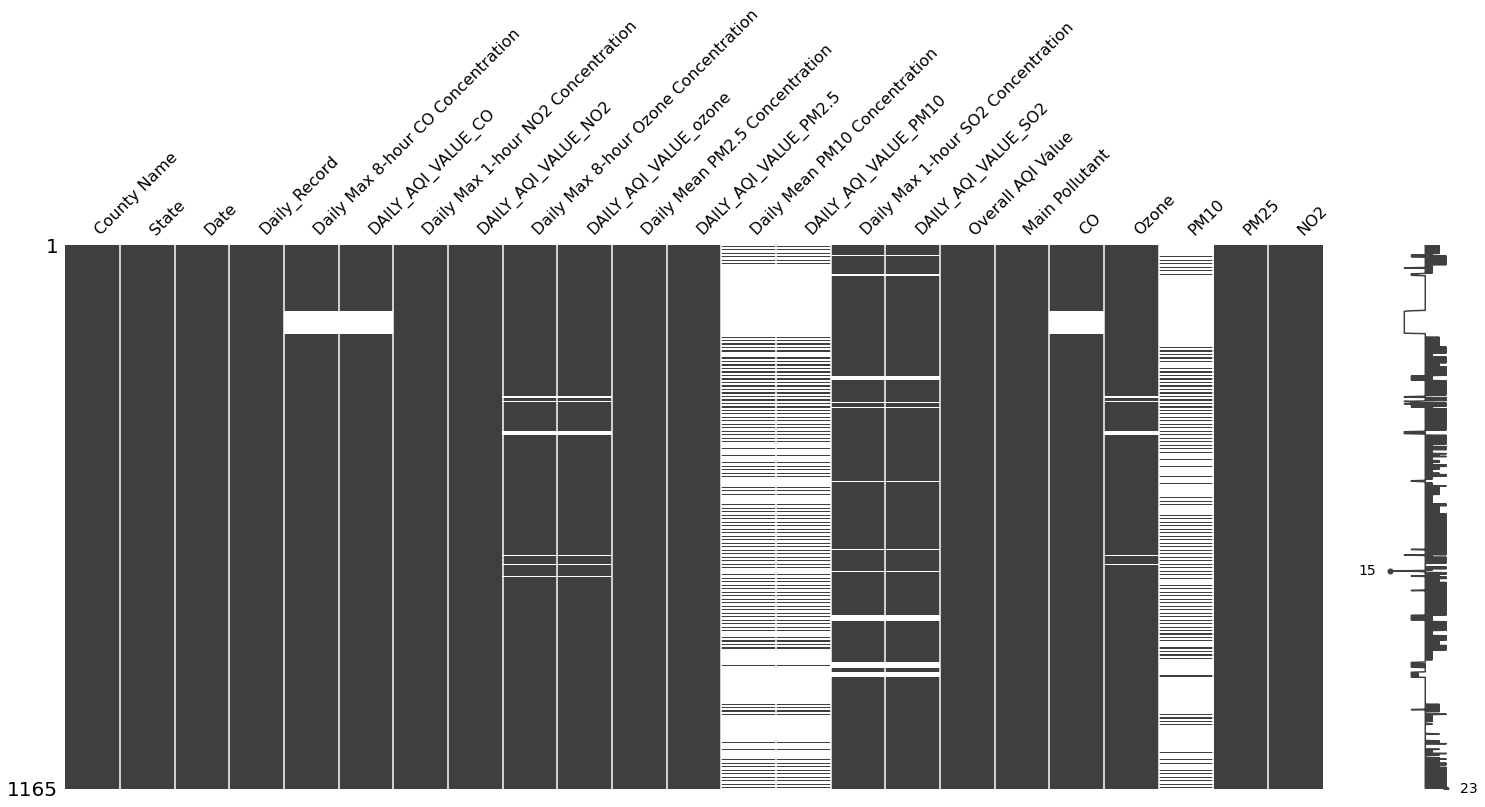

In [239]:
# Visualizing the locations of the missing data
# Import the library
import missingno as mno

# Check the missing values
mno.matrix(df_final)

There are missing values present in the data frame, particularly in the PM10 data. These gaps in data might result from recording errors or malfunctioning detection. In the CO data, the missing values are concentrated within specific date periods, suggesting potential recording issues during those days. The Ozone and SO2 data exhibit random missing values. In the case of the PM10 data, the recording period seems irregular and not daily.

Several methods can be employed to handle missing values:

1. For PM10 data, due to its high proportion of missing values (78.5%), it's advisable to drop the entire column.
2. Regarding CO data, as the missing values cover a small period, consider Listwise Deletion by removing these specific rows.
3. Addressing the  1.63% missing values ib Ozone data and 5.4% missing values in SO2 data, a Multivariate feature imputation approach such as Multivariate Imputation by Chained Equations (MICE) is suitable. This method can handle missing values even when the data exhibits correlation or classification patterns, as is the case with time series data.

For more comprehensive insights and techniques, following notebook is introducing how to handle the missing values: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python?scriptVersionId=38521662.

In [300]:
#Drop the PM10 data
columns_to_drop = ["Daily Mean PM10 Concentration", "DAILY_AQI_VALUE_PM10","PM10"]
df = df_final.copy()

df.drop(columns=columns_to_drop, inplace=True)

# Display the modified dataframe
display(df.head())
display(df.info())

County Name State       Date  Daily_Record  \
0  King County     WA 2020-01-22             1   
1  King County     WA 2020-01-23             1   
2  King County     WA 2020-01-24             1   
3  King County     WA 2020-01-25             1   
4  King County     WA 2020-01-26             1   

   Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO  \
0                                0.3                 3.0   
1                                0.4                 5.0   
2                                0.4                 5.0   
3                                0.5                 6.0   
4                                0.4                 5.0   

   Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2  \
0                                41.7                   39   
1                                38.0                   36   
2                                40.6                   38   
3                                28.3                   26   
4                                18.7                   17   

   Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone  \
0                                 0.019                   18.0   
1                                 0.022                   20.0   
2                                 0.031                   29.0   
3                                 0.021                   19.0   
4                                 0.036                   33.0   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5  \
0                             0.6                      3   
1                             0.3                      1   
2                             0.9                      4   
3                             0.7                      3   
4                             1.2                      5   

   Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2  Overall AQI Value  \
0                                 0.5                  0.0                 39   
1                                 0.8                  0.0                 36   
2                                 0.5                  0.0                 38   
3                                 0.4                  0.0                 30   
4                                 0.6                  0.0                 33   

  Main Pollutant   CO  Ozone  PM25  NO2  
0            NO2  3.0   26.0    35   39  
1            NO2  5.0   20.0    28   36  
2            NO2  5.0   29.0    22   38  
3          PM2.5  6.0   19.0    30   26  
4          Ozone  5.0   33.0    23   17

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   County Name                           1165 non-null   object        
 1   State                                 1165 non-null   object        
 2   Date                                  1165 non-null   datetime64[ns]
 3   Daily_Record                          1165 non-null   int64         
 4   Daily Max 8-hour CO Concentration     1117 non-null   float64       
 5   DAILY_AQI_VALUE_CO                    1117 non-null   float64       
 6   Daily Max 1-hour NO2 Concentration    1165 non-null   float64       
 7   DAILY_AQI_VALUE_NO2                   1165 non-null   int64         
 8   Daily Max 8-hour Ozone Concentration  1146 non-null   float64       
 9   DAILY_AQI_VALUE_ozone                 1146 non-null   float64       
 10  

None

County Name State       Date  Daily_Record  \
0     King County     WA 2020-01-22             1   
1     King County     WA 2020-01-23             1   
2     King County     WA 2020-01-24             1   
3     King County     WA 2020-01-25             1   
4     King County     WA 2020-01-26             1   
...            ...   ...        ...           ...   
1160  King County     WA 2023-03-27        553161   
1161  King County     WA 2023-03-28        553161   
1162  King County     WA 2023-03-29        553161   
1163  King County     WA 2023-03-30        554184   
1164  King County     WA 2023-03-31        554184   

      Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO  \
0                                   0.3                 3.0   
1                                   0.4                 5.0   
2                                   0.4                 5.0   
3                                   0.5                 6.0   
4                                   0.4                 5.0   
...                                 ...                 ...   
1160                                0.3                 3.0   
1161                                0.2                 2.0   
1162                                0.5                 6.0   
1163                                0.5                 6.0   
1164                                0.3                 3.0   

      Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2  \
0                                   41.7                   39   
1                                   38.0                   36   
2                                   40.6                   38   
3                                   28.3                   26   
4                                   18.7                   17   
...                                  ...                  ...   
1160                                19.4                   18   
1161                                16.0                   15   
1162                                44.4                   42   
1163                                27.7                   25   
1164                                22.9                   21   

      Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone  \
0                                    0.019                   18.0   
1                                    0.022                   20.0   
2                                    0.031                   29.0   
3                                    0.021                   19.0   
4                                    0.036                   33.0   
...                                    ...                    ...   
1160                                 0.042                   39.0   
1161                                 0.043                   40.0   
1162                                 0.041                   38.0   
1163                                 0.043                   40.0   
1164                                 0.038                   35.0   

      Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5  \
0                                0.6                      3   
1                                0.3                      1   
2                                0.9                      4   
3                                0.7                      3   
4                                1.2                      5   
...                              ...                    ...   
1160                             1.2                      5   
1161                             1.4                      6   
1162                             2.5                     10   
1163                             2.4                     10   
1164                             1.2                      5   

      Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2  \
0                                    0.5                  0.0   
1                                    0.8                  0.0   
2                                    0.5           

<AxesSubplot:>

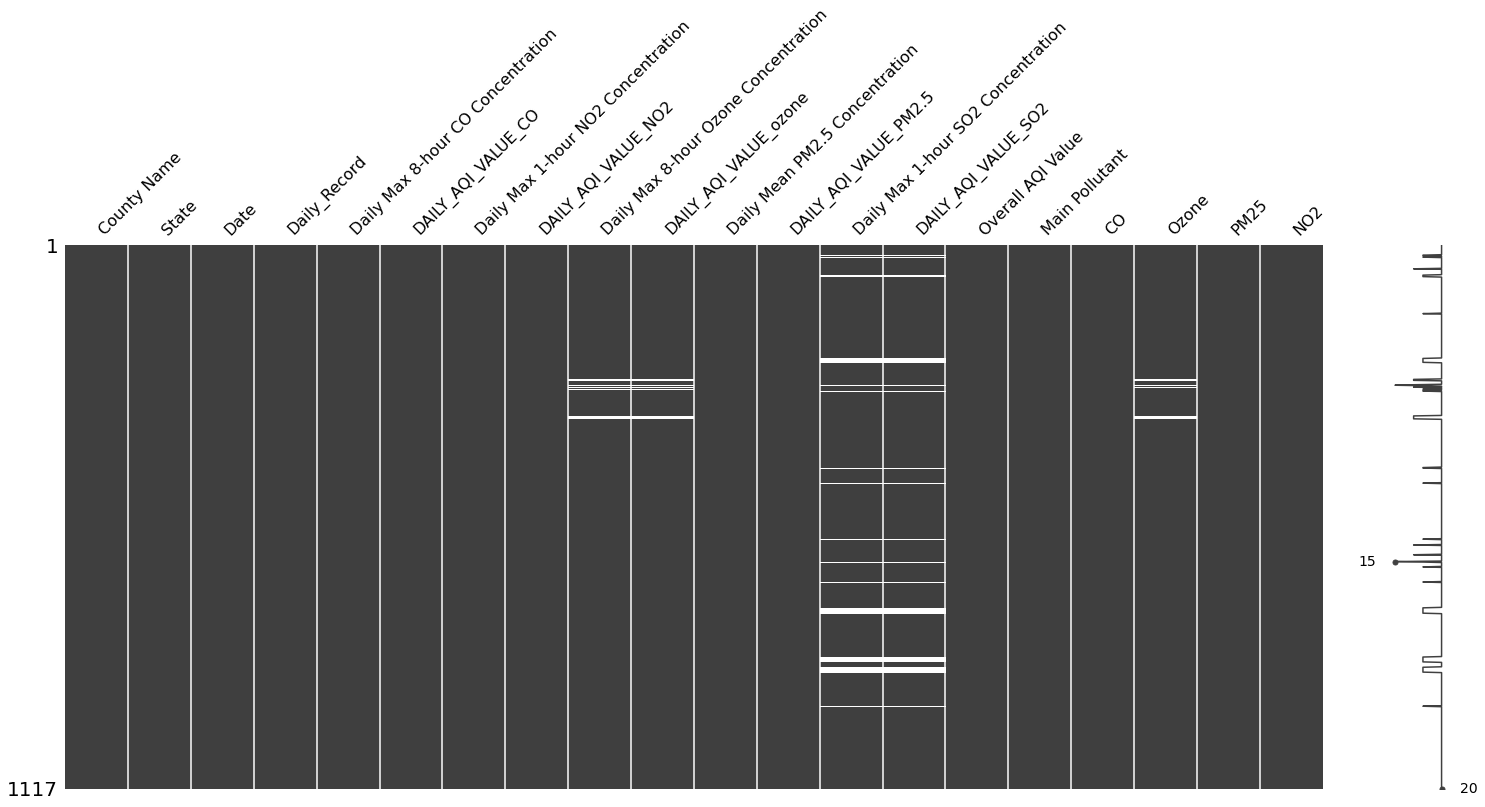

In [301]:
# Listwise Deletion of the data in the CO data
# Drop rows which contains any NaN or missing value for CO column

df.dropna(subset=["Daily Max 8-hour CO Concentration",], inplace=True)

# Display the modified dataframe
display(df)
mno.matrix(df)

In [242]:
# Multivariate imputation by chained equations (MICE) in Ozone and S02 data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Make a copy of the dataframe
df = df.copy(deep=True)

# Specify columns for imputation
imputer_columns = ['Daily Max 8-hour Ozone Concentration', 'DAILY_AQI_VALUE_ozone', 'Daily Max 1-hour SO2 Concentration', 'DAILY_AQI_VALUE_SO2',"Ozone"]
# Create an IterativeImputer object
imputer = IterativeImputer()

# Apply imputation to the specified columns
df[imputer_columns] = imputer.fit_transform(df[imputer_columns])

# Display the modified dataframe
display(df)
display(df.isnull().sum())

County Name State       Date  Daily_Record  \
0     King County     WA 2020-01-22             1   
1     King County     WA 2020-01-23             1   
2     King County     WA 2020-01-24             1   
3     King County     WA 2020-01-25             1   
4     King County     WA 2020-01-26             1   
...            ...   ...        ...           ...   
1160  King County     WA 2023-03-27        553161   
1161  King County     WA 2023-03-28        553161   
1162  King County     WA 2023-03-29        553161   
1163  King County     WA 2023-03-30        554184   
1164  King County     WA 2023-03-31        554184   

      Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE_CO  \
0                                   0.3                 3.0   
1                                   0.4                 5.0   
2                                   0.4                 5.0   
3                                   0.5                 6.0   
4                                   0.4                 5.0   
...                                 ...                 ...   
1160                                0.3                 3.0   
1161                                0.2                 2.0   
1162                                0.5                 6.0   
1163                                0.5                 6.0   
1164                                0.3                 3.0   

      Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE_NO2  \
0                                   41.7                   39   
1                                   38.0                   36   
2                                   40.6                   38   
3                                   28.3                   26   
4                                   18.7                   17   
...                                  ...                  ...   
1160                                19.4                   18   
1161                                16.0                   15   
1162                                44.4                   42   
1163                                27.7                   25   
1164                                22.9                   21   

      Daily Max 8-hour Ozone Concentration  DAILY_AQI_VALUE_ozone  \
0                                    0.019                   18.0   
1                                    0.022                   20.0   
2                                    0.031                   29.0   
3                                    0.021                   19.0   
4                                    0.036                   33.0   
...                                    ...                    ...   
1160                                 0.042                   39.0   
1161                                 0.043                   40.0   
1162                                 0.041                   38.0   
1163                                 0.043                   40.0   
1164                                 0.038                   35.0   

      Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE_PM2.5  \
0                                0.6                      3   
1                                0.3                      1   
2                                0.9                      4   
3                                0.7                      3   
4                                1.2                      5   
...                              ...                    ...   
1160                             1.2                      5   
1161                             1.4                      6   
1162                             2.5                     10   
1163                             2.4                     10   
1164                             1.2                      5   

      Daily Max 1-hour SO2 Concentration  DAILY_AQI_VALUE_SO2  \
0                                    0.5                  0.0   
1                                    0.8                  0.0   
2                                    0.5           

County Name                             0
State                                   0
Date                                    0
Daily_Record                            0
Daily Max 8-hour CO Concentration       0
DAILY_AQI_VALUE_CO                      0
Daily Max 1-hour NO2 Concentration      0
DAILY_AQI_VALUE_NO2                     0
Daily Max 8-hour Ozone Concentration    0
DAILY_AQI_VALUE_ozone                   0
Daily Mean PM2.5 Concentration          0
DAILY_AQI_VALUE_PM2.5                   0
Daily Max 1-hour SO2 Concentration      0
DAILY_AQI_VALUE_SO2                     0
Overall AQI Value                       0
Main Pollutant                          0
CO                                      0
Ozone                                   0
PM25                                    0
NO2                                     0
dtype: int64

## 2-2 Data visulization

In [302]:
# Remove the County Name and State column before analysis

columns_to_drop = ["County Name", "State"]
df.drop(columns=columns_to_drop, inplace=True)

display(df.head())

Date  Daily_Record  Daily Max 8-hour CO Concentration  \
0 2020-01-22             1                                0.3   
1 2020-01-23             1                                0.4   
2 2020-01-24             1                                0.4   
3 2020-01-25             1                                0.5   
4 2020-01-26             1                                0.4   

   DAILY_AQI_VALUE_CO  Daily Max 1-hour NO2 Concentration  \
0                 3.0                                41.7   
1                 5.0                                38.0   
2                 5.0                                40.6   
3                 6.0                                28.3   
4                 5.0                                18.7   

   DAILY_AQI_VALUE_NO2  Daily Max 8-hour Ozone Concentration  \
0                   39                                 0.019   
1                   36                                 0.022   
2                   38                                 0.031   
3                   26                                 0.021   
4                   17                                 0.036   

   DAILY_AQI_VALUE_ozone  Daily Mean PM2.5 Concentration  \
0                   18.0                             0.6   
1                   20.0                             0.3   
2                   29.0                             0.9   
3                   19.0                             0.7   
4                   33.0                             1.2   

   DAILY_AQI_VALUE_PM2.5  Daily Max 1-hour SO2 Concentration  \
0                      3                                 0.5   
1                      1                                 0.8   
2                      4                                 0.5   
3                      3                                 0.4   
4                      5                                 0.6   

   DAILY_AQI_VALUE_SO2  Overall AQI Value Main Pollutant   CO  Ozone  PM25  \
0                  0.0                 39            NO2  3.0   26.0    35   
1                  0.0                 36            NO2  5.0   20.0    28   
2                  0.0                 38            NO2  5.0   29.0    22   
3                  0.0                 30          PM2.5  6.0   19.0    30   
4                  0.0                 33          Ozone  5.0   33.0    23   

   NO2  
0   39  
1   36  
2   38  
3   26  
4   17

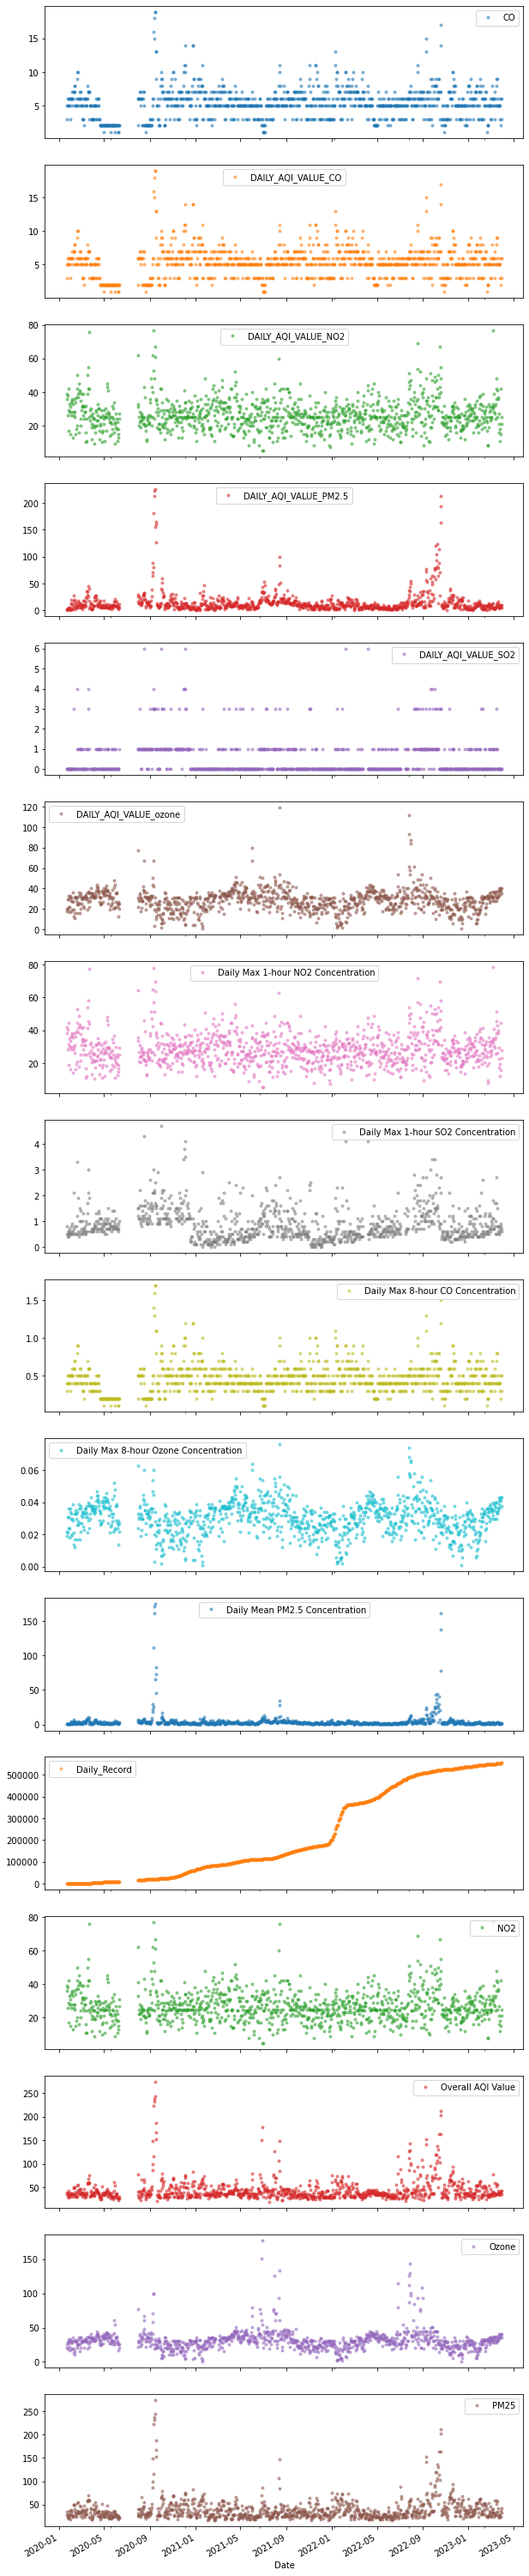

In [303]:
columns_to_plot = df.columns.difference(['Date',"Main Pollutant"])

# Plot the data using .plot
axes = df.plot(x='Date', y=columns_to_plot, marker='.', alpha=0.5, linestyle='None', figsize=(10, 60), subplots=True)


# Display the plots
plt.show()

Check the outliners by using box plot.

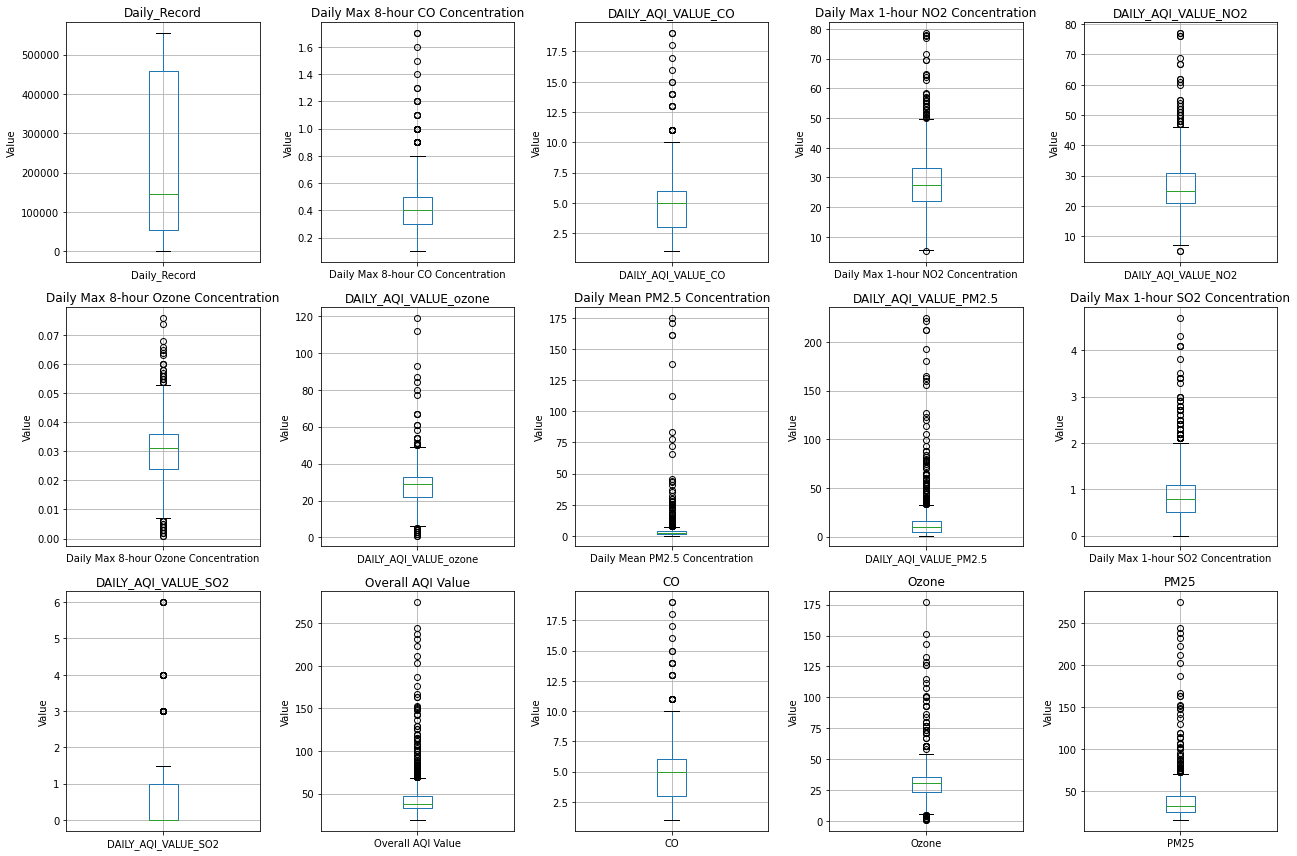

In [245]:
# Get the list of column names (excluding "Date")
column_names = [col for col in df.columns if col not in ['Date', 'Main Pollutant']]

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 5
num_subplots = num_rows * num_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each column in a subplot
for i, column_name in enumerate(column_names):
    if i < num_subplots:
        row = i // num_cols
        col = i % num_cols
        df.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_ylabel('Value')

# Hide any unused subplots
for i in range(len(column_names), num_subplots):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [246]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2020, 2023]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

In [304]:
display(df.head())

Date  Daily_Record  Daily Max 8-hour CO Concentration  \
0 2020-01-22             1                                0.3   
1 2020-01-23             1                                0.4   
2 2020-01-24             1                                0.4   
3 2020-01-25             1                                0.5   
4 2020-01-26             1                                0.4   

   DAILY_AQI_VALUE_CO  Daily Max 1-hour NO2 Concentration  \
0                 3.0                                41.7   
1                 5.0                                38.0   
2                 5.0                                40.6   
3                 6.0                                28.3   
4                 5.0                                18.7   

   DAILY_AQI_VALUE_NO2  Daily Max 8-hour Ozone Concentration  \
0                   39                                 0.019   
1                   36                                 0.022   
2                   38                                 0.031   
3                   26                                 0.021   
4                   17                                 0.036   

   DAILY_AQI_VALUE_ozone  Daily Mean PM2.5 Concentration  \
0                   18.0                             0.6   
1                   20.0                             0.3   
2                   29.0                             0.9   
3                   19.0                             0.7   
4                   33.0                             1.2   

   DAILY_AQI_VALUE_PM2.5  Daily Max 1-hour SO2 Concentration  \
0                      3                                 0.5   
1                      1                                 0.8   
2                      4                                 0.5   
3                      3                                 0.4   
4                      5                                 0.6   

   DAILY_AQI_VALUE_SO2  Overall AQI Value Main Pollutant   CO  Ozone  PM25  \
0                  0.0                 39            NO2  3.0   26.0    35   
1                  0.0                 36            NO2  5.0   20.0    28   
2                  0.0                 38            NO2  5.0   29.0    22   
3                  0.0                 30          PM2.5  6.0   19.0    30   
4                  0.0                 33          Ozone  5.0   33.0    23   

   NO2  
0   39  
1   36  
2   38  
3   26  
4   17

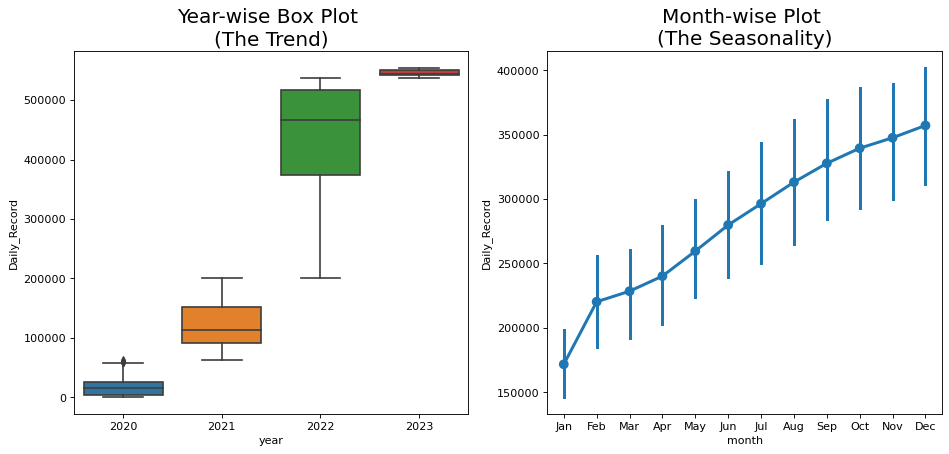

In [306]:
df.reset_index(inplace=True)
df = df.copy()
value='Daily_Record'
trend_plot(df,value)

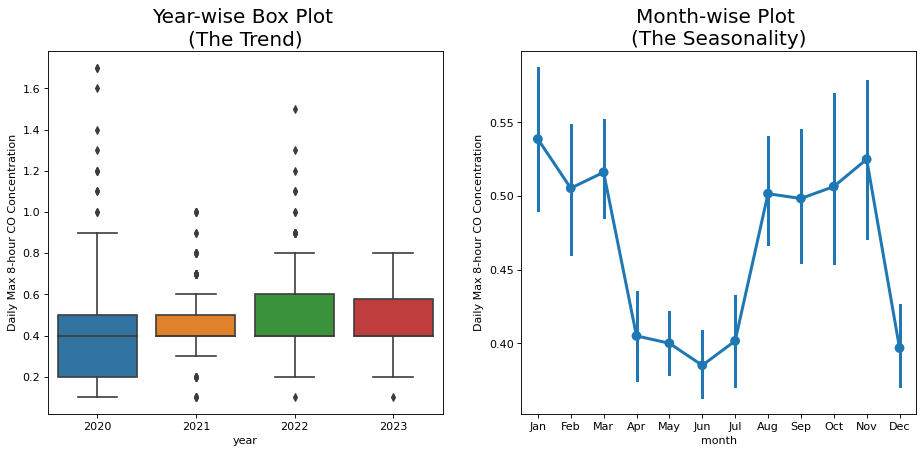

In [311]:
df = df.copy()
value='Daily Max 8-hour CO Concentration'
trend_plot(df,value)

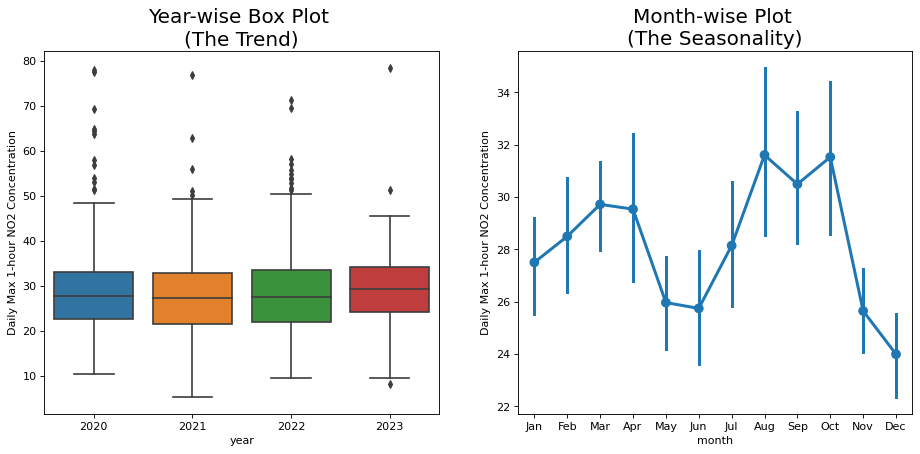

In [309]:

df = df.copy()
value='Daily Max 1-hour NO2 Concentration'
trend_plot(df,value)

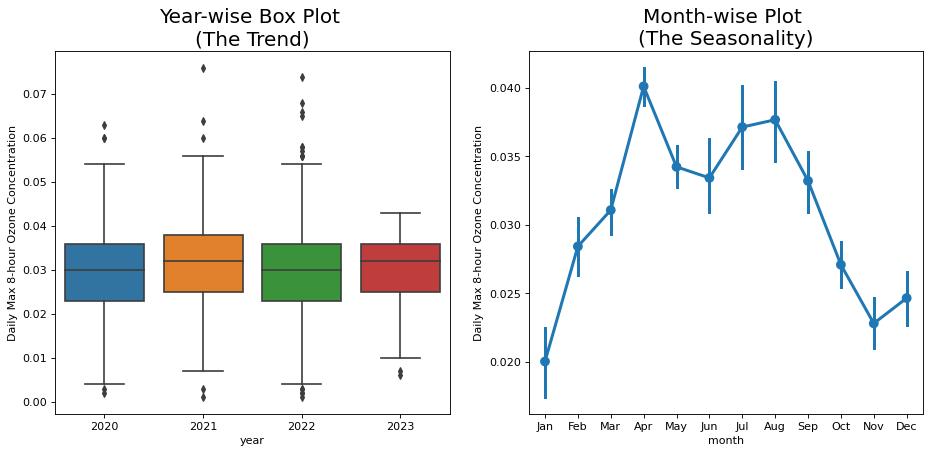

In [310]:
df = df.copy()
value='Daily Max 8-hour Ozone Concentration'
trend_plot(df,value)

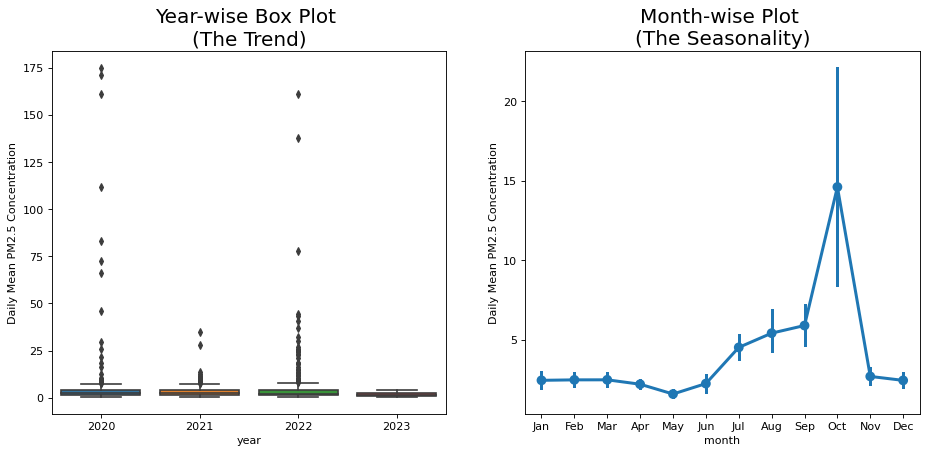

In [313]:
df = df.copy()
value='Daily Mean PM2.5 Concentration'
trend_plot(df,value)

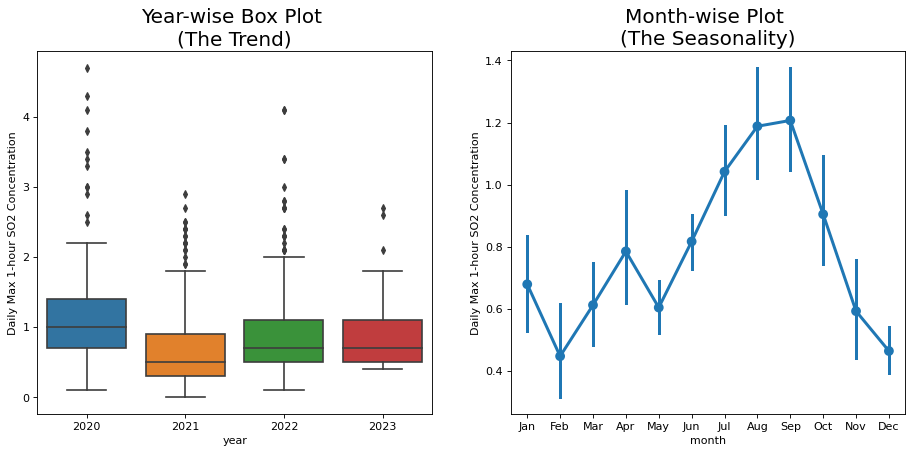

In [314]:
df = df.copy()
value='Daily Max 1-hour SO2 Concentration'
trend_plot(df,value)

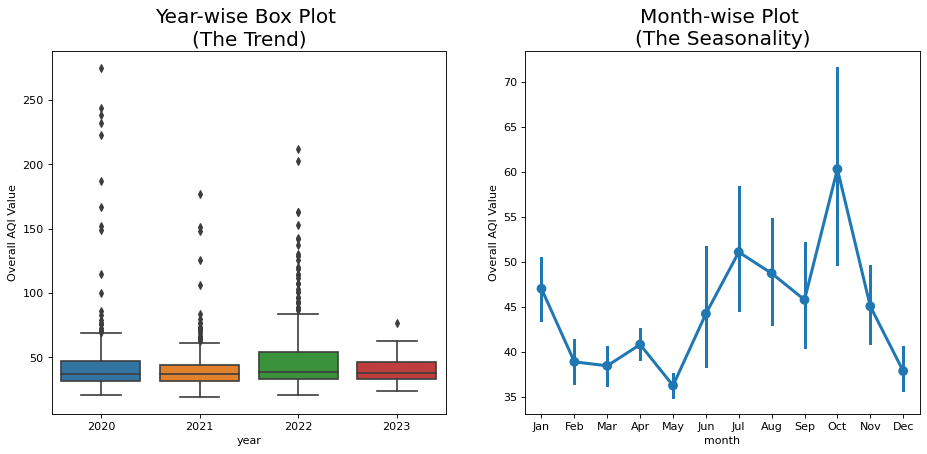

In [315]:
df = df.copy()
value='Overall AQI Value'
trend_plot(df,value)

In [247]:
# Calculate the new cases per day and generate a new column "New_cases"
df['New_cases'] = df['Daily_Record'].diff().fillna(0)

#Set the decrease number of new cases to zero
df['New_cases'] = df['New_cases'].apply(lambda x: max(x, 0))

# Now 'new_cases' column contains the new cases per day
display(df.tail(10))

Date  Daily_Record  Daily Max 8-hour CO Concentration  \
1155 2023-03-22        552130                                0.5   
1156 2023-03-23        553161                                0.4   
1157 2023-03-24        553161                                0.4   
1158 2023-03-25        553161                                0.4   
1159 2023-03-26        553161                                0.4   
1160 2023-03-27        553161                                0.3   
1161 2023-03-28        553161                                0.2   
1162 2023-03-29        553161                                0.5   
1163 2023-03-30        554184                                0.5   
1164 2023-03-31        554184                                0.3   

      DAILY_AQI_VALUE_CO  Daily Max 1-hour NO2 Concentration  \
1155                 6.0                                39.7   
1156                 5.0                                22.4   
1157                 5.0                                29.4   
1158                 5.0                                17.2   
1159                 5.0                                12.0   
1160                 3.0                                19.4   
1161                 2.0                                16.0   
1162                 6.0                                44.4   
1163                 6.0                                27.7   
1164                 3.0                                22.9   

      DAILY_AQI_VALUE_NO2  Daily Max 8-hour Ozone Concentration  \
1155                   37                                 0.037   
1156                   21                                 0.043   
1157                   27                                 0.039   
1158                   16                                 0.041   
1159                   11                                 0.037   
1160                   18                                 0.042   
1161                   15                                 0.043   
1162                   42                                 0.041   
1163                   25                                 0.043   
1164                   21                                 0.038   

      DAILY_AQI_VALUE_ozone  Daily Mean PM2.5 Concentration  \
1155                   34.0                             3.9   
1156                   40.0                             1.2   
1157                   36.0                             0.9   
1158                   38.0                             2.5   
1159                   34.0                             2.0   
1160                   39.0                             1.2   
1161                   40.0                             1.4   
1162                   38.0                             2.5   
1163                   40.0                             2.4   
1164                   35.0                             1.2   

      DAILY_AQI_VALUE_PM2.5  Daily Max 1-hour SO2 Concentration  \
1155                     16                                 0.8   
1156                      5                                 0.8   
1157                      4                                 0.5   
1158                     10                                 0.5   
1159                      8                                 0.7   
1160                      5                                 0.6   
1161                      6                                 0.8   
1162                     10                                 0.9   
1163                     10                                 0.7   
1164                      5                                 0.6   

      DAILY_AQI_VALUE_SO2  Overall AQI Value Main Pollutant   CO  Ozone  PM25  \
1155                  0.0                 43          PM2.5  6.0   34.0    43   
1156                  0.0                 40          Ozone  5.0   40.0    25   
1157                  0.0                 36          Ozone  5.0   36.0    22   
1158                  0.0                 38          Ozone  5.

<AxesSubplot:>

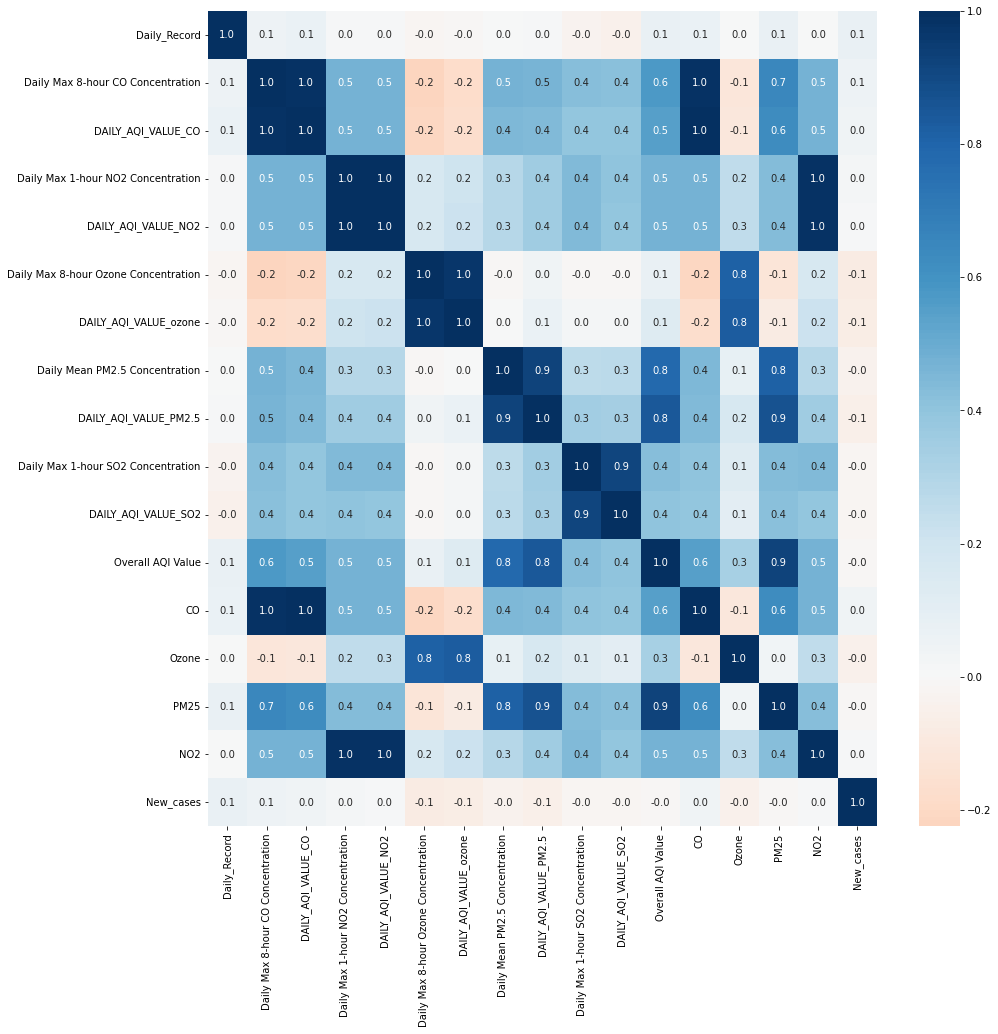

In [248]:
# Calculate the paired coefficiency and determine the features used in the future clustering
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0,ax=ax)

Based on the correlation matrix, it's evident that the daily concentration is highly correlated with the related daily AQI values. Given this strong correlation, I will choose to use either the daily concentration or the AQI values for subsequent analysis. For the purpose of modeling and analysis, I will opt to use the AQI values. This decision will help streamline the analysis and prevent redundancy.

In [249]:
# Get the data for analysis
df_1 = df.copy()
columns_to_drop_1 = ["Daily Max 8-hour CO Concentration","Daily Max 1-hour NO2 Concentration","Daily Max 8-hour Ozone Concentration","Daily Mean PM2.5 Concentration","Daily Max 1-hour SO2 Concentration"]
df_analysis = df_1.drop(columns=columns_to_drop_1)
display(df_analysis.info())
display(df_analysis.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 0 to 1164
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1117 non-null   datetime64[ns]
 1   Daily_Record           1117 non-null   int64         
 2   DAILY_AQI_VALUE_CO     1117 non-null   float64       
 3   DAILY_AQI_VALUE_NO2    1117 non-null   int64         
 4   DAILY_AQI_VALUE_ozone  1117 non-null   float64       
 5   DAILY_AQI_VALUE_PM2.5  1117 non-null   int64         
 6   DAILY_AQI_VALUE_SO2    1117 non-null   float64       
 7   Overall AQI Value      1117 non-null   int64         
 8   Main Pollutant         1117 non-null   object        
 9   CO                     1117 non-null   float64       
 10  Ozone                  1117 non-null   float64       
 11  PM25                   1117 non-null   int64         
 12  NO2                    1117 non-null   int64         
 13  New

None

Daily_Record  DAILY_AQI_VALUE_CO  DAILY_AQI_VALUE_NO2  \
count    1117.000000          1117.00000          1117.000000   
mean   232981.783348             5.35094            26.543420   
std    203610.912073             2.27666             9.268261   
min         1.000000             1.00000             5.000000   
25%     54535.000000             3.00000            21.000000   
50%    145409.000000             5.00000            25.000000   
75%    458454.000000             6.00000            31.000000   
max    554184.000000            19.00000            77.000000   

       DAILY_AQI_VALUE_ozone  DAILY_AQI_VALUE_PM2.5  DAILY_AQI_VALUE_SO2  \
count            1117.000000            1117.000000          1117.000000   
mean               28.317941              15.056401             0.505946   
std                10.670632              21.989926             0.868214   
min                 1.000000               1.000000             0.000000   
25%                22.000000               5.000000             0.000000   
50%                29.000000              10.000000             0.000000   
75%                33.000000              16.000000             1.000000   
max               119.000000             225.000000             6.000000   

       Overall AQI Value           CO        Ozone         PM25          NO2  \
count        1117.000000  1117.000000  1117.000000  1117.000000  1117.000000   
mean           44.608774     5.354521    31.404842    39.089526    26.809311   
std            24.800603     2.274530    15.477572    24.730538     9.215091   
min            19.000000     1.000000     1.000000    16.000000     5.000000   
25%            33.000000     3.000000    24.000000    25.000000    21.000000   
50%            38.000000     5.000000    31.000000    33.000000    25.000000   
75%            47.000000     6.000000    36.000000    44.000000    31.000000   
max           275.000000    19.000000   177.000000   275.000000    77.000000   

          New_cases  
count   1117.000000  
mean     498.804834  
std     1410.397240  
min        0.000000  
25%        0.000000  
50%       75.000000  
75%      429.000000  
max    19214.000000

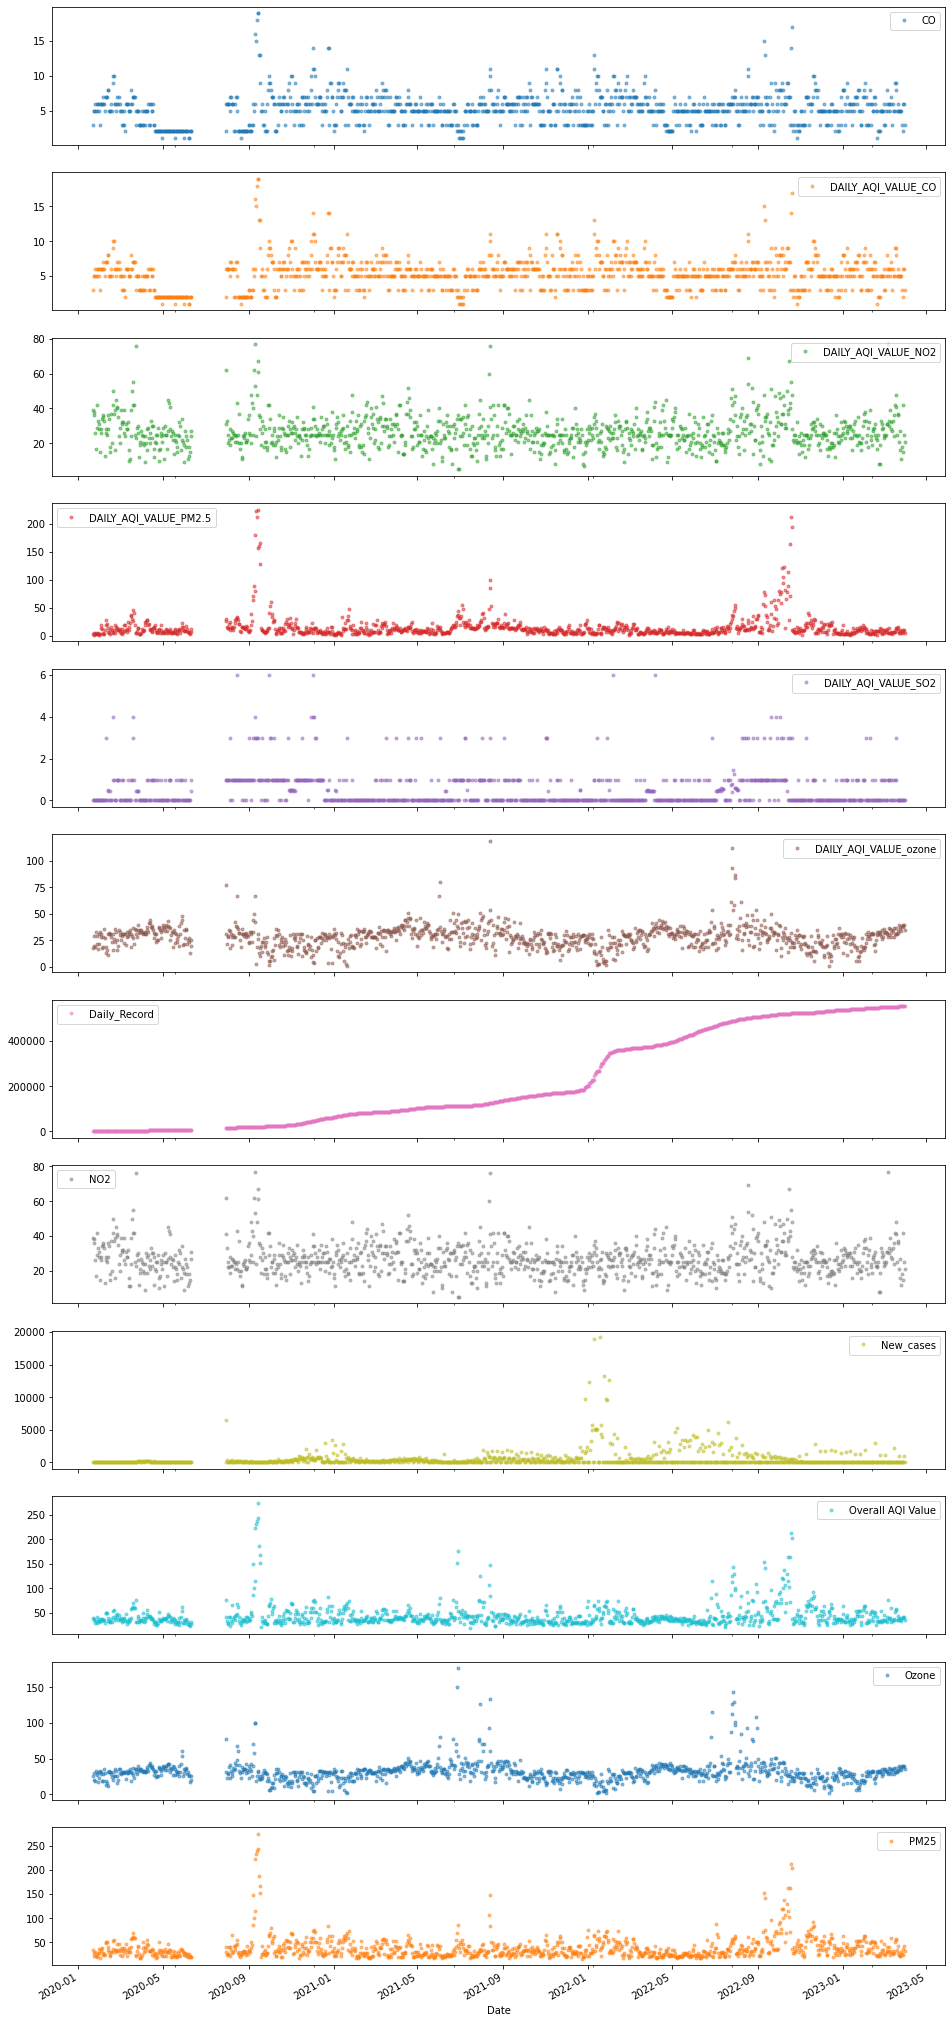

In [250]:
#Plot the new data frame
columns_to_plot = df_analysis.columns.difference(['Date'])

# Plot the data using .plot
axes = df_analysis.plot(x='Date', y=columns_to_plot, marker='.', alpha=0.5, linestyle='None', figsize=(16, 40), subplots=True)

# Display the plots
plt.show()

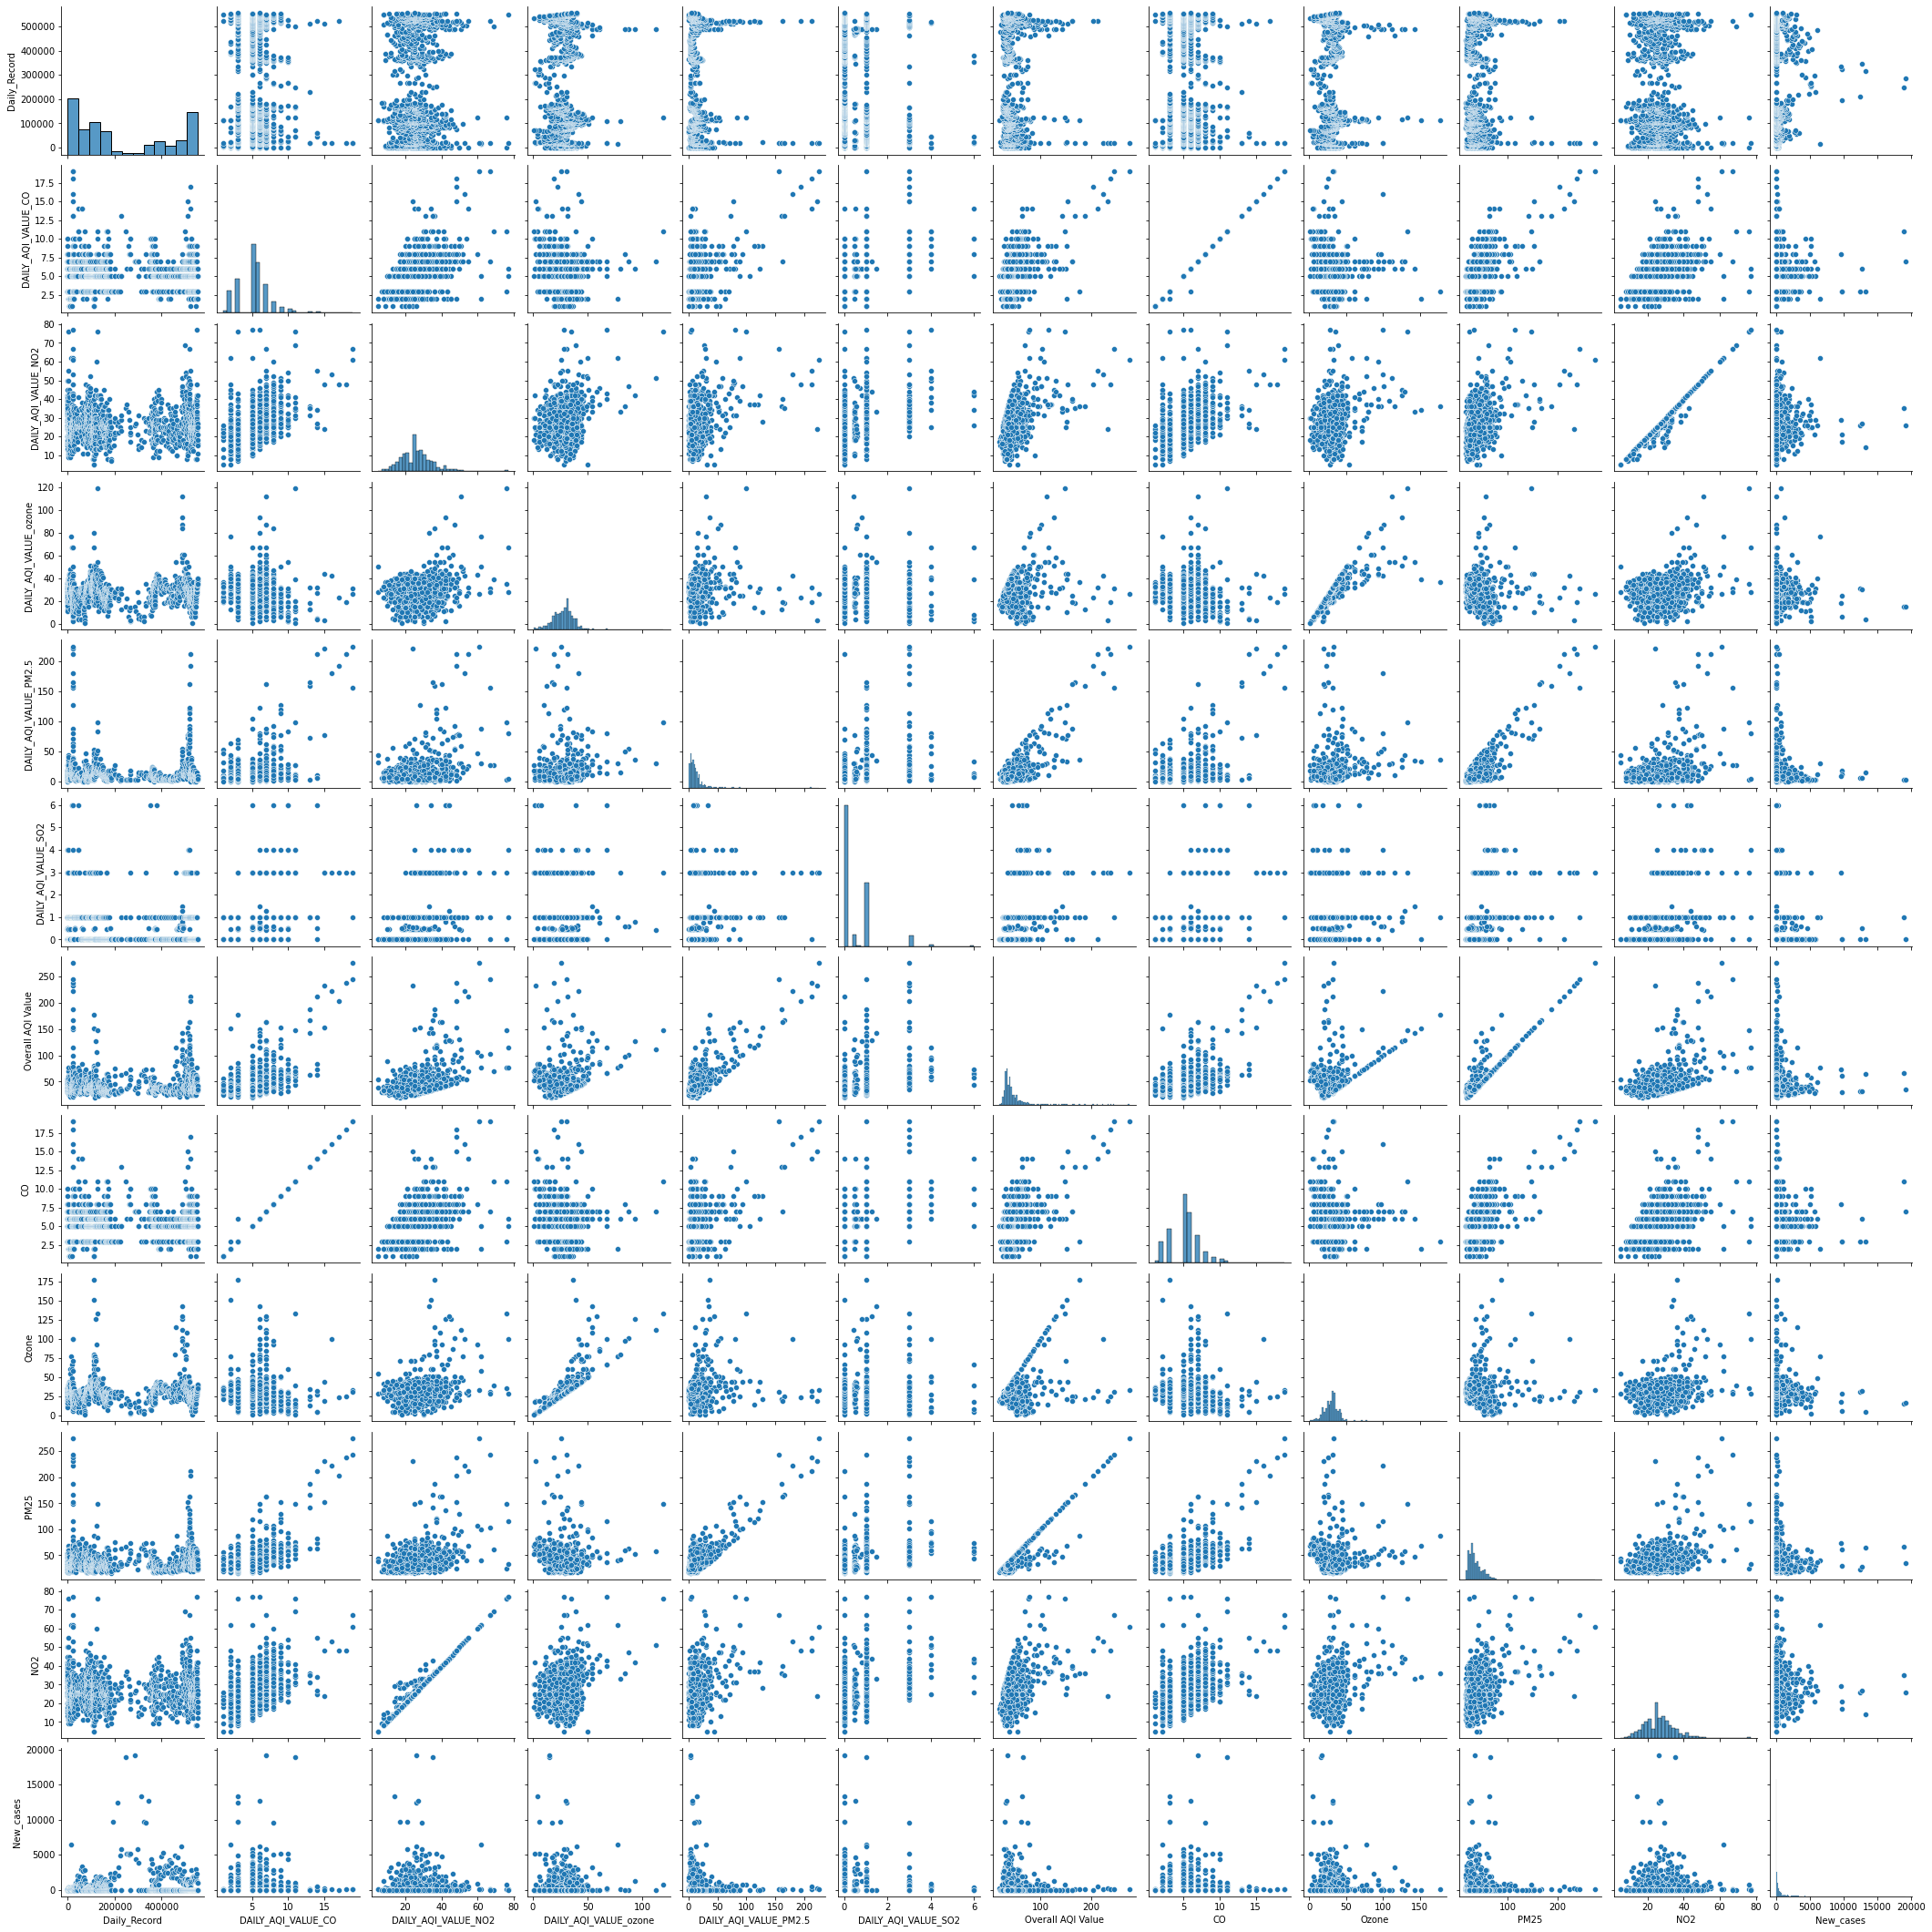

In [251]:
sns.pairplot(df_analysis)

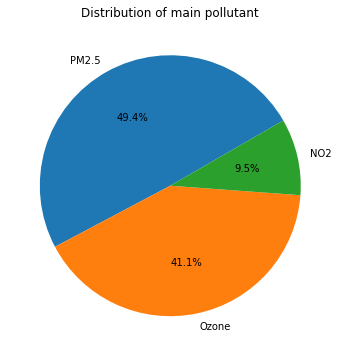

In [252]:
# Visulize the "Main pollutant" by using pie chart
pollutant_counts = df_analysis['Main Pollutant'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(pollutant_counts, labels=pollutant_counts.index, autopct='%1.1f%%', startangle=30)
plt.title('Distribution of main pollutant')
plt.show()

In [253]:
import plotly.express as px

plot_df = df_analysis.copy()  # Create a copy of the original DataFrame
plot_df['Year'] = df_analysis['Date'].dt.year
plot_df['Month'] = df_analysis['Date'].dt.month
plot_df["Day"] = df_analysis['Date'].dt.day
plot_df['AQI'] = df_analysis["Overall AQI Value"]

# Create the 3D scatter plot
fig = px.scatter_3d(plot_df, x="Year", y="Month", z="AQI",
                    color="AQI", color_continuous_scale=["#00FF00", "#FFC800", "#FF0000", "#B803BF"],animation_frame = "Day", 
                    range_color=(-45, 225))

fig.update_traces(marker=dict(size=3.5))  # scaling down the markers
fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=12))
fig.show()

<AxesSubplot:>

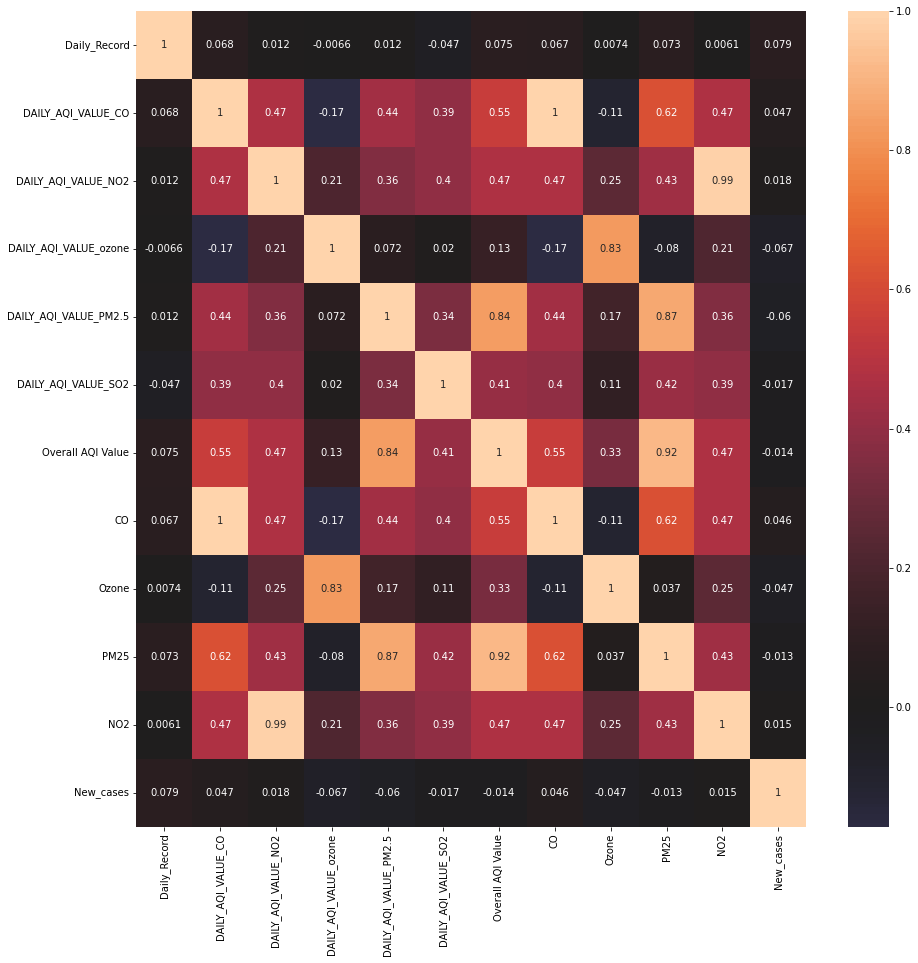

In [254]:
corr = df_analysis.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr, annot=True,center=0,ax=ax)

# 3. Model building to do data mining

Here, I plan to use the 1. Explanatory Model to understand how different features contribute to the COVID case number; 2. Perform multiple linear regression models to predict COVID-19 case numbers based on air quality parameters; 3. Time series analysis.

## 3.1 Explanatory Model

Use the "Daily_Record" as the target

In [255]:
# Define the input features as well as the target
df_input = df_analysis.iloc[:, 2:13]  # This is the input dataset with various feature values.
df_case = df[["Daily_Record"]]      # This is the dataset of case number.
display(df_input.head())
display(df_input.shape)
display(df_case.head())
display(df_case.shape)

DAILY_AQI_VALUE_CO  DAILY_AQI_VALUE_NO2  DAILY_AQI_VALUE_ozone  \
0                 3.0                   39                   18.0   
1                 5.0                   36                   20.0   
2                 5.0                   38                   29.0   
3                 6.0                   26                   19.0   
4                 5.0                   17                   33.0   

   DAILY_AQI_VALUE_PM2.5  DAILY_AQI_VALUE_SO2  Overall AQI Value  \
0                      3                  0.0                 39   
1                      1                  0.0                 36   
2                      4                  0.0                 38   
3                      3                  0.0                 30   
4                      5                  0.0                 33   

  Main Pollutant   CO  Ozone  PM25  NO2  
0            NO2  3.0   26.0    35   39  
1            NO2  5.0   20.0    28   36  
2            NO2  5.0   29.0    22   38  
3          PM2.5  6.0   19.0    30   26  
4          Ozone  5.0   33.0    23   17

(1117, 11)

Daily_Record
0             1
1             1
2             1
3             1
4             1

(1117, 1)

In [256]:
# Encode the "Mail Pollutant" object data to numeric data
from sklearn.preprocessing import LabelEncoder
# Map category values to numeric values

#Create a dictionary to map specific values to numeric values
value_mapping = {'NO2': 1, 'Ozone': 2, 'PM2.5': 3}

# Replace the values in the column using the mapping dictionary
df_input['Main Pollutant'] = df_input['Main Pollutant'].replace(value_mapping)


display(df_input.head())
display(df_input.shape)

DAILY_AQI_VALUE_CO  DAILY_AQI_VALUE_NO2  DAILY_AQI_VALUE_ozone  \
0                 3.0                   39                   18.0   
1                 5.0                   36                   20.0   
2                 5.0                   38                   29.0   
3                 6.0                   26                   19.0   
4                 5.0                   17                   33.0   

   DAILY_AQI_VALUE_PM2.5  DAILY_AQI_VALUE_SO2  Overall AQI Value  \
0                      3                  0.0                 39   
1                      1                  0.0                 36   
2                      4                  0.0                 38   
3                      3                  0.0                 30   
4                      5                  0.0                 33   

   Main Pollutant   CO  Ozone  PM25  NO2  
0               1  3.0   26.0    35   39  
1               1  5.0   20.0    28   36  
2               1  5.0   29.0    22   38  
3               3  6.0   19.0    30   26  
4               2  5.0   33.0    23   17

(1117, 11)

In [257]:
# Add a constant for the intercept in making the multiple linear regression model
X = sm.add_constant(df_input)
y = df_case

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary to interpret coefficients
print("The explanatory model summary targeting the Covid daily cases number")
print("---------------------------------------")
print(model.summary())

The explanatory model summary targeting the Covid daily cases number
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:           Daily_Record   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.987
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.01e-05
Time:                        11:48:02   Log-Likelihood:                -15217.
No. Observations:                1117   AIC:                         3.046e+04
Df Residuals:                    1105   BIC:                         3.052e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------

To understand the explanatory model when using the linear regression model to explain the target variable "Daily_record":
1.R-squared, which is 0.038. The R-squared measures the goodness of fit of the model, indicating how well the features variables explain the variation in the target variable"Daily_record". Here, the R-squared is 0.038, which means about 3.8% of the variance in the target variable is explained by the input features.This R-squared value of 0.038 indicates that the model is not performing well in explaining the data variability and likely requires further improvement. It's possible that the relationship between the input features and the target variable is more complex than what the current model is capturing.
2.Coefficients and P>|t|.The "coef" represents the estimated coefficients of the input features in the linear regression equation. coefficient values greater than zero indicades a positive relationship while less than zero a negative relationship. Larger coefficient suggests stronger effect on the target. Here, variable "DAILY_AQI_VALUE_NO2" and "Overall AQI Value" show postive relaitonship with the target but the standard errors is also big.

Use the "New_cases" as target

In [258]:
#Get the output data
df_newcase = df[["New_cases"]]
display(df_newcase.head())
display(df_newcase.shape)

# Fit the model and get the summary report.
X = sm.add_constant(df_input)
y = df_newcase

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary to interpret coefficients
print("The explanatory model summary targeting the new Covid daily cases number")
print("---------------------------------------")
print(model.summary())

New_cases
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0

(1117, 1)

The explanatory model summary targeting the new Covid daily cases number
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:              New_cases   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.737
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0607
Time:                        11:48:02   Log-Likelihood:                -9674.9
No. Observations:                1117   AIC:                         1.937e+04
Df Residuals:                    1105   BIC:                         1.943e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------

R-squared, which is 0.017 means about 1.7% of the variance in the target variable is explained by the input features.Just a little bit better than the mdoel targeting "Daily_records". This R-squared value indicates that the model is not performing well in explaining the data variability.

Then I try Polynomial Regression. If the relationship between the input features and the target variable is not linear, we can try fitting a polynomial regression model. 

In [259]:
import statsmodels.api as sm

# Create polynomial features
degree = 2  # You can choose the degree of polynomial
X_poly = X.copy()
for col in X.columns:
    for i in range(2, degree + 1):
        col_name = f"{col}_poly_{i}"
        X_poly[col_name] = X[col] ** i

# Fit the polynomial regression model
model = sm.OLS(y, X_poly).fit()

# Print the model summary
print("The Polynomial Regression explanatory model summary targeting the daily new cases number")
print("---------------------------------------")
print(model.summary())

The Polynomial Regression explanatory model summary targeting the daily new cases number
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:              New_cases   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.524
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0574
Time:                        11:48:02   Log-Likelihood:                -9667.7
No. Observations:                1117   AIC:                         1.938e+04
Df Residuals:                    1094   BIC:                         1.950e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.

In [260]:
# Try different degree parameter

degree = 3  # You can choose the degree of polynomial
X_poly = X.copy()
for col in X.columns:
    for i in range(2, degree + 1):
        col_name = f"{col}_poly_{i}"
        X_poly[col_name] = X[col] ** i

# Fit the polynomial regression model
model = sm.OLS(y, X_poly).fit()

# Print the model summary
print("The Polynomial Regression explanatory model summary targeting the daily new cases number")
print("---------------------------------------")
print(model.summary())

The Polynomial Regression explanatory model summary targeting the daily new cases number
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:              New_cases   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.347
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0981
Time:                        11:48:02   Log-Likelihood:                -9663.4
No. Observations:                1117   AIC:                         1.939e+04
Df Residuals:                    1085   BIC:                         1.955e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.

The R-squared by using Polynomial Regression model is 0.029 when the degree is 2 and is 0.036 when the degree is 3. This results indicates that we can not use this model to explanate the target by using these features.

There are several possible reasons for a small R-squared value:

1. Weak Relationship: The explanatory variables might not have a strong linear relationship with the target variable.
2. Missing Variables: Important variables might be missing from the model, leading to omitted variable bias.
3. High Multicollinearity: Explanatory variables might be highly correlated, leading to multicollinearity issues and unreliable coefficient estimates.
4. Outliers and Influential Points: Outliers or influential data points might be affecting the model's performance.

Given the small number of R squated, I will not use multiple linear regression for the daily record analysis. I will try to use the air condition to classify the new cases number 

## 3-2 KNN regression for new cases

(1) PCA dimension reduction

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data of the features
# Create a StandardScaler object
scaler = StandardScaler()

scaler.fit(df_input)
scaled_data =scaler.transform(df_input)
display(scaled_data)

array([[-1.03308913,  1.34460601, -0.96738065, ..., -0.34936119,
        -0.16543746,  1.32349747],
       [-0.1542159 ,  1.02077571, -0.77986636, ..., -0.73719253,
        -0.4486151 ,  0.99779871],
       [-0.1542159 ,  1.23666258,  0.06394792, ..., -0.15544552,
        -0.6913388 ,  1.21493122],
       ...,
       [ 0.28522072,  1.6684363 ,  0.90776221, ...,  0.42630149,
        -0.12498351,  1.64919623],
       [ 0.28522072, -0.16660204,  1.09527649, ...,  0.5555786 ,
         0.11774019, -0.19643008],
       [-1.03308913, -0.59837577,  0.62649078, ...,  0.23238582,
        -0.28679931, -0.63069509]])

(2) Fit the model

In [262]:
# Use the PCA tech to fit the data. I will try to use 3 principal components decomposition
pca=PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)


#Check the column number before and after PCA
print("The shape of data before PCA")
display(scaled_data.shape)

print("-----------------------------------")
print("The shape of data after PCA")
display(x_pca.shape)

The shape of data before PCA


(1117, 11)

-----------------------------------
The shape of data after PCA


(1117, 3)

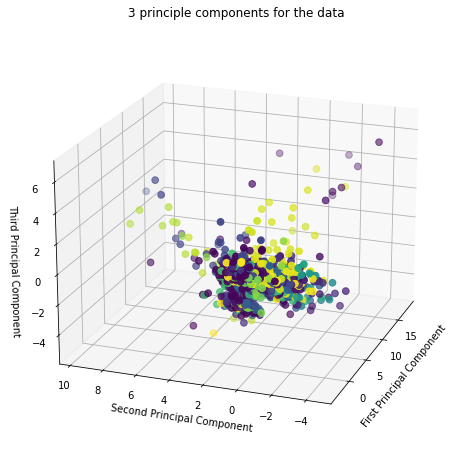

In [263]:
#Plot the 3 principle components and see the explained Variance
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df["Daily_Record"], cmap='viridis', s=45)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title("3 principle components for the data")
ax.view_init(20, 200)


In [264]:
# Use the PCA tech to fit the data. I will try to seethe expanied variance of all components decomposition of all features then deternmin the number of principal components.
pca =PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#Check the column number before and after PCA
print("The shape of data before PCA")
display(scaled_data.shape)

print("-----------------------------------")
print("The shape of data after PCA")
display(x_pca.shape)

# View the explanied variance to justify the results
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_), 'Proportion of variance': pca.explained_variance_ratio_, 'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary_df.columns) + 1)]
display(pcaSummary_df.round(4))
print('The cumulative explained variation ratio for data is : {}'.format(np.cumsum(pca.explained_variance_ratio_)))

The shape of data before PCA


(1117, 11)

-----------------------------------
The shape of data after PCA


(1117, 11)

PC1     PC2     PC3     PC4     PC5     PC6  \
Standard deviation      2.2148  1.5285  1.1601  0.8485  0.8470  0.8019   
Proportion of variance  0.4455  0.2122  0.1222  0.0654  0.0652  0.0584   
Cumulative proportion   0.4455  0.6578  0.7800  0.8454  0.9105  0.9690   

                           PC7     PC8     PC9    PC10    PC11  
Standard deviation      0.4508  0.3274  0.1417  0.1022  0.0291  
Proportion of variance  0.0185  0.0097  0.0018  0.0009  0.0001  
Cumulative proportion   0.9874  0.9971  0.9990  0.9999  1.0000

The cumulative explained variation ratio for data is : [0.44554499 0.65775874 0.77998762 0.84538001 0.91054039 0.96895378
 0.98741273 0.99714874 0.99897375 0.99992287 1.        ]


Based on the PCA explained variation and the cumulative explained variation ratio, the first seven components account for approximately 98.74% of the total variation in the 11 variables. This indicates that these seven components capture a significant portion of the original data's variability. As a result, we can use these first seven components for the later regression analysis.

In [265]:
# Create a new dataframe containing the first seven components
# Get the first ten pca data
seven_pca = x_pca[0:7]
display(seven_pca.shape)
# Transform rows of ten_pca data become the columns of seven_pca.T. The transpose allows work with the principal components as columns rather than rows.
seven_pca.T
display(seven_pca.T.shape)

# Performs matrix multiplication between the original DataFrame df containing the 11 variables (columns) and the first seven principal components (seven_pca.T).
# The result is a new DataFrame which contains the reduced components.

transformed_df = np.dot(df_input,seven_pca.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
new_df['New_cases'] = df_analysis["New_cases"]
new_df.describe()

(7, 11)

(11, 7)

PC1          PC2          PC3          PC4          PC5  \
count  1117.000000  1117.000000  1117.000000  1117.000000  1117.000000   
mean    -47.454141   -40.152939   -12.878126   -94.990646    38.052291   
std      36.570475    29.378920    27.242926    33.004438    16.482492   
min    -303.700000  -262.887349  -169.914863  -360.446954    14.168183   
25%     -58.416922   -52.341119   -26.732352  -101.325860    29.785439   
50%     -43.347492   -40.236269   -12.997309   -87.869043    34.571334   
75%     -28.628235   -25.692957     2.050177   -77.403064    40.370950   
max      34.474879    48.948014    90.181590   -47.693837   159.433722   

               PC6          PC7     New_cases  
count  1117.000000  1117.000000   1069.000000  
mean    -30.250013   -43.229979    512.231057  
std      14.983784    35.194182   1434.843407  
min    -146.573177  -298.296750      0.000000  
25%     -33.769834   -57.726044      0.000000  
50%     -27.929592   -42.348265     89.000000  
75%     -22.405081   -24.534573    436.000000  
max      -5.354553    56.896153  19214.000000

In [266]:
# Splitting the data into training and testing data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(new_df.iloc[:,:7], df_analysis["New_cases"], test_size=0.2, random_state=42)

# Check the shape of the train and test data
display(X_pca_train.shape)
display(X_pca_test.shape)
display(y_pca_train.shape)
display(y_pca_test.shape)

(893, 7)

(224, 7)

(893,)

(224,)

In [267]:
print("NaN values:", np.isnan(X_pca_train).sum())
print("Infinity values:", np.isinf(X_pca_train).sum())
print("Maximum value:", X_pca_train.max())
print("Minimum value:", X_pca_train.min())

NaN values: PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
PC6    0
PC7    0
dtype: int64
Infinity values: PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
PC6    0
PC7    0
dtype: int64
Maximum value: PC1     34.474879
PC2     48.698505
PC3     90.181590
PC4    -48.943025
PC5    159.433722
PC6     -5.978673
PC7     56.896153
dtype: float64
Minimum value: PC1   -303.700000
PC2   -262.887349
PC3   -169.914863
PC4   -360.446954
PC5     14.168183
PC6   -146.573177
PC7   -298.296750
dtype: float64


In [268]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [269]:
k = 5  # Number of neighbors to consider
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_pca_train, y_pca_train)
y_pred = model.predict(X_pca_test)

mse = mean_squared_error(y_pca_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_pca_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_pca_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 2587182.1055357144
Root Mean Squared Error: 1608.4719784738913
Mean Absolute Error: 649.7294642857141
R-squared Score: -0.16151607379663413


Mean Squared Error (MSE): This metric measures the average squared difference between the actual target values and the predicted values. A higher MSE value indicates that the model's predictions are more spread out from the actual values.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and is expressed in the same units as the target variable. It provides a measure of how close the predicted values are to the actual values. A lower RMSE indicates that the model's predictions are closer to the actual values.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual target values and the predicted values. It gives an idea of the average magnitude of the errors. Like RMSE, lower MAE values are better.

R-squared (R2) Score: The R-squared score is a measure of how well the regression model explains the variability in the target variable. It ranges between 0 and 1. A higher R2 score indicates that a larger proportion of the variability in the target variable is explained by the model. However, in your case, you have a negative R2 score, which suggests that the model is performing worse than a simple horizontal line (a baseline model)

## 3-3 Time series analysis

## Split the data into training and testing data

In [270]:
# Split the data into two sets: training (df_train, about 80% of original data) and test (df_test, about 18% of original data) set

df_train = df_analysis.loc[(df_analysis['Date'] <= '2022-9-30')]
display(df_train .info())

df_test = df_analysis.loc[(df_analysis['Date'] > '2022-9-30')]
display(df_test .info())

# Conver the 'date' to index
data_train = df_train.set_index("Date")

data_test = df_test.set_index("Date")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 982
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   935 non-null    datetime64[ns]
 1   Daily_Record           935 non-null    int64         
 2   DAILY_AQI_VALUE_CO     935 non-null    float64       
 3   DAILY_AQI_VALUE_NO2    935 non-null    int64         
 4   DAILY_AQI_VALUE_ozone  935 non-null    float64       
 5   DAILY_AQI_VALUE_PM2.5  935 non-null    int64         
 6   DAILY_AQI_VALUE_SO2    935 non-null    float64       
 7   Overall AQI Value      935 non-null    int64         
 8   Main Pollutant         935 non-null    object        
 9   CO                     935 non-null    float64       
 10  Ozone                  935 non-null    float64       
 11  PM25                   935 non-null    int64         
 12  NO2                    935 non-null    int64         
 13  New_c

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 983 to 1164
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   182 non-null    datetime64[ns]
 1   Daily_Record           182 non-null    int64         
 2   DAILY_AQI_VALUE_CO     182 non-null    float64       
 3   DAILY_AQI_VALUE_NO2    182 non-null    int64         
 4   DAILY_AQI_VALUE_ozone  182 non-null    float64       
 5   DAILY_AQI_VALUE_PM2.5  182 non-null    int64         
 6   DAILY_AQI_VALUE_SO2    182 non-null    float64       
 7   Overall AQI Value      182 non-null    int64         
 8   Main Pollutant         182 non-null    object        
 9   CO                     182 non-null    float64       
 10  Ozone                  182 non-null    float64       
 11  PM25                   182 non-null    int64         
 12  NO2                    182 non-null    int64         
 13  Ne

None

## "New_cases" data

(1) Decomposition

2020-2023 King County COVID daily new case record


/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/3071671989.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



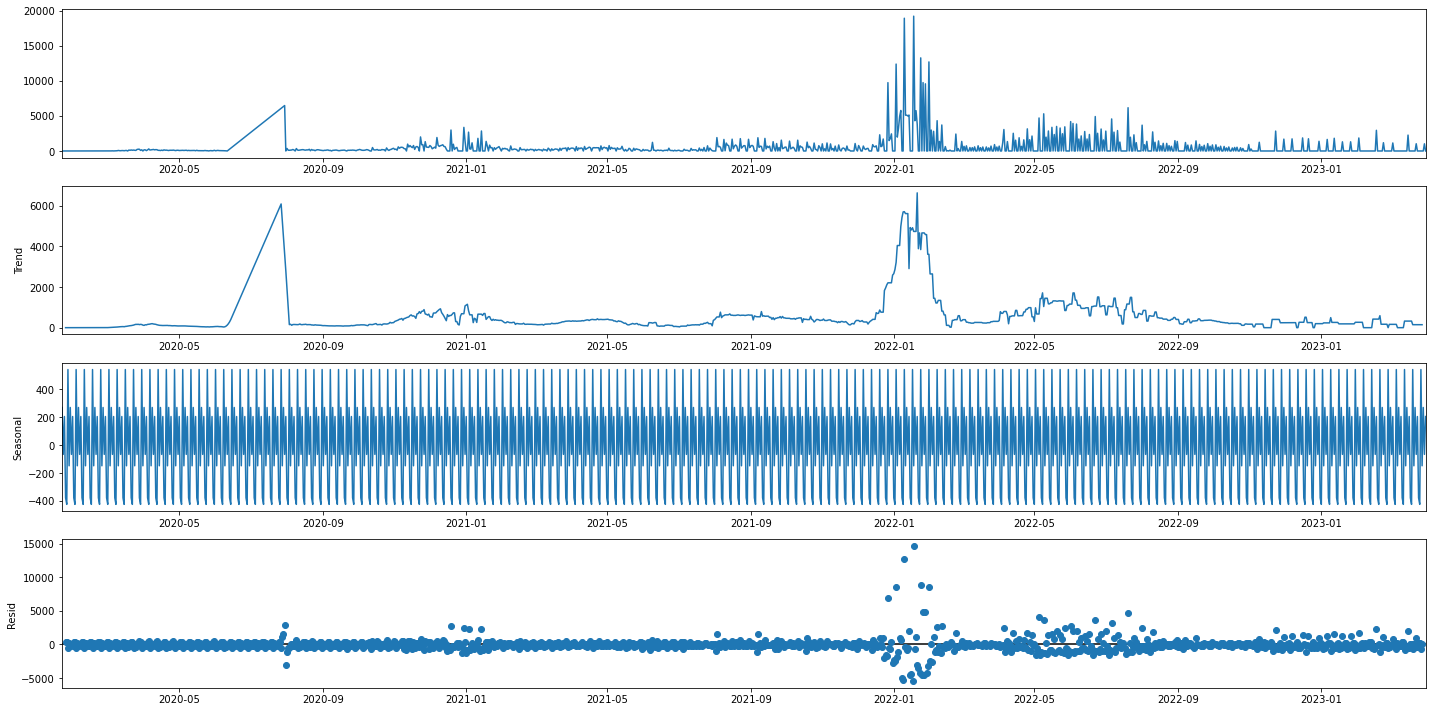

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_new_cases = df_analysis[["Date", "New_cases"]]
df_new_cases["Date"] = pd.to_datetime(df_new_cases["Date"])  # Convert "Date" column to datetime
df_new_cases.set_index("Date", inplace=True)  # Set "Date" column as index

# Set frequency for daily data
df_new_cases = df_new_cases.asfreq('D')

# Interpolate missing values
df_new_cases["New_cases"] = df_new_cases["New_cases"].interpolate()

new_cases_decom = seasonal_decompose(df_new_cases, model="additive")
plt.rcParams['figure.figsize'] = [20, 10]
print("2020-2023 King County COVID daily new case record")
new_cases_decom.plot()
plt.show()


(2) Build forecasting model using multiple time series models
We can see clear seasonality from the visual decompistion plot.

In [272]:
#New cases
data_train_nc = data_train[["New_cases"]]
data_test_nc = data_test[["New_cases"]]

display(data_train_nc.head())
display(data_test_nc.head())

New_cases
Date                 
2020-01-22        0.0
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        0.0

New_cases
Date                 
2022-10-01        0.0
2022-10-02        0.0
2022-10-03      882.0
2022-10-04        0.0
2022-10-05      536.0

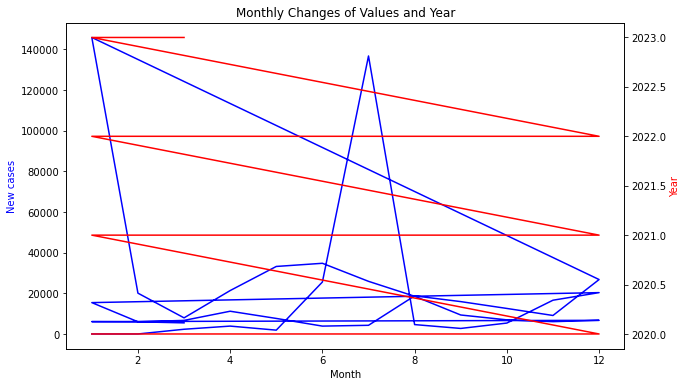

In [273]:
# Visulizae the monthly change of "new cases" each year
df = df_new_cases.copy()
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month information
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['New_cases'] = df['New_cases']
# Group by Year and Month and calculate the sum of values
grouped = df.groupby(['Year', 'Month'])['New_cases'].sum().reset_index()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the left y-axis (values)
ax1.plot(grouped['Month'], grouped['New_cases'], color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('New cases', color='blue')

# Create a secondary y-axis on the right side for years
ax2 = ax1.twinx()
ax2.plot(grouped['Month'], grouped['Year'], color='red')
ax2.set_ylabel('Year', color='red')

plt.title('Monthly Changes of Values and Year')
plt.show()

### Use SimpleExpSmoothing and ExponentialSmoothing model to do the time series analysis

In [274]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceW

Simple ES - MAE: 464.60, RMSE: 567.22, MAPE: 1464447782632186368.00%
Exp Smoothing - MAE: 531.07, RMSE: 711.00, MAPE: 1423426042888320768.00%


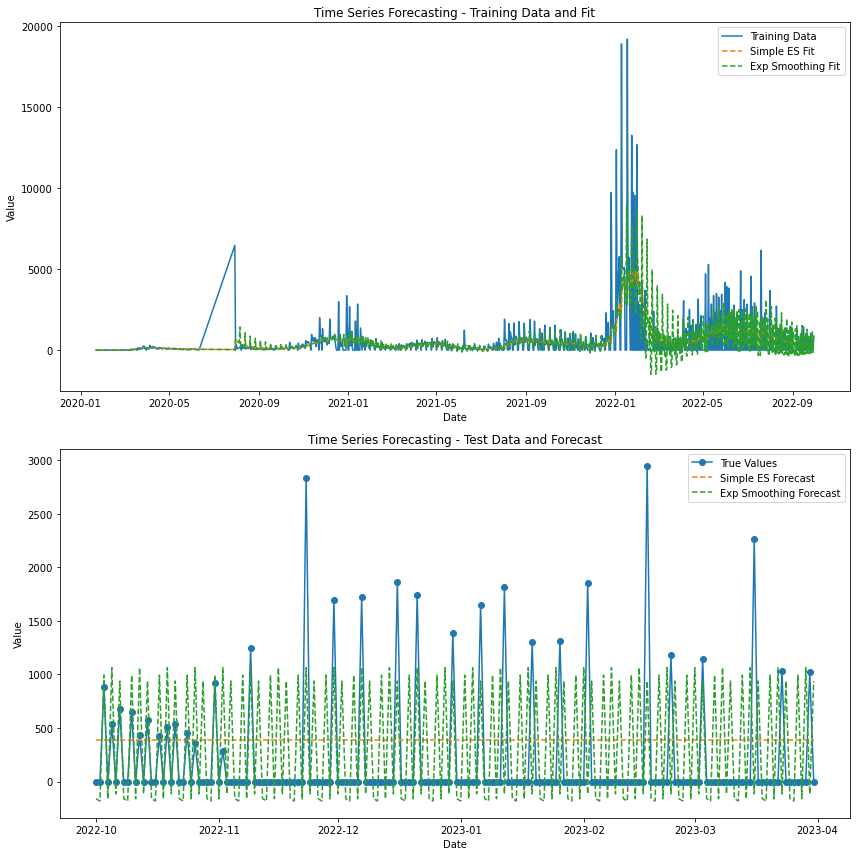

In [275]:
# Fit the models and forecast
simple_es = SimpleExpSmoothing(data_train_nc['New_cases']).fit()
simple_es_forecast = simple_es.forecast(steps=len(data_test_nc))

exp_smoothing = ExponentialSmoothing(data_train_nc['New_cases'], seasonal='add', seasonal_periods=7).fit()
exp_smoothing_forecast = exp_smoothing.forecast(steps=len(data_test_nc))

# Calculate evaluation metrics
mae_simple_es = mean_absolute_error(data_test_nc['New_cases'], simple_es_forecast)
rmse_simple_es = np.sqrt(mean_squared_error(data_test_nc['New_cases'], simple_es_forecast))
mape_simple_es = mean_absolute_percentage_error(data_test_nc['New_cases'], simple_es_forecast) 

mae_exp_smoothing = mean_absolute_error(data_test_nc['New_cases'], exp_smoothing_forecast)
rmse_exp_smoothing = np.sqrt(mean_squared_error(data_test_nc['New_cases'], exp_smoothing_forecast))
mape_exp_smoothing = mean_absolute_percentage_error(data_test_nc['New_cases'], auto_arima_forecast)


print(f"Simple ES - MAE: {mae_simple_es:.2f}, RMSE: {rmse_simple_es:.2f}, MAPE: {mape_simple_es:.2f}%")
print(f"Exp Smoothing - MAE: {mae_exp_smoothing:.2f}, RMSE: {rmse_exp_smoothing:.2f}, MAPE: {mape_exp_smoothing:.2f}%")

# Plotting the training data and fit model data
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(data_train_nc.index, data_train_nc['New_cases'], label='Training Data')
plt.plot(data_train_nc.index, simple_es.fittedvalues, label='Simple ES Fit', linestyle='dashed')
plt.plot(data_train_nc.index, exp_smoothing.fittedvalues, label='Exp Smoothing Fit', linestyle='dashed')
plt.legend()
plt.title('Time Series Forecasting - Training Data and Fit')
plt.xlabel('Date')
plt.ylabel('Value')

# Plotting the test data and forecasted values
plt.subplot(2, 1, 2)
plt.plot(data_test_nc.index, data_test_nc['New_cases'], label='True Values', marker='o')
plt.plot(data_test_nc.index, simple_es_forecast, label='Simple ES Forecast', linestyle='dashed')
plt.plot(data_test_nc.index, exp_smoothing_forecast, label='Exp Smoothing Forecast', linestyle='dashed')
plt.legend()
plt.title('Time Series Forecasting - Test Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


### Use ARIMA and auto-ARIMA to do the time series analysis

In [276]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [277]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [278]:
# Fit SARIMAX model
order = (1, 1, 1)  # Specify the order of SARIMA (p, d, q)
sarimax_model = SARIMAX(data_train_nc['New_cases'], order=order)
sarimax_fit = sarimax_model.fit(disp=0)
sarimax_forecast = sarimax_fit.forecast(steps=len(data_test_nc))

# Fit auto-ARIMA model
auto_arima_model = auto_arima(data_train_nc['New_cases'], seasonal=False, suppress_warnings=True)
auto_arima_insample = auto_arima_model.predict_in_sample()
auto_arima_forecast = auto_arima_model.predict(n_periods=len(data_test_nc))

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid

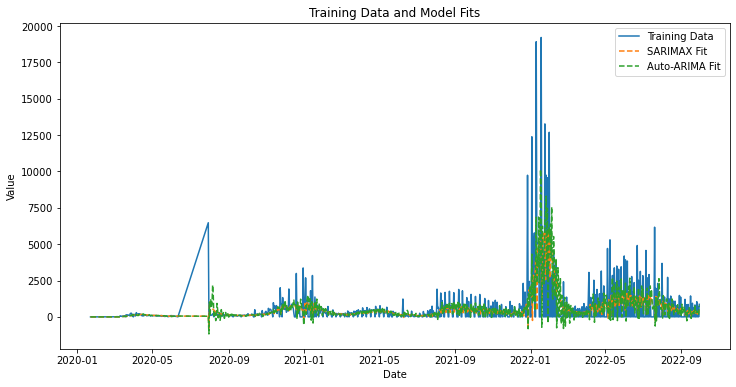

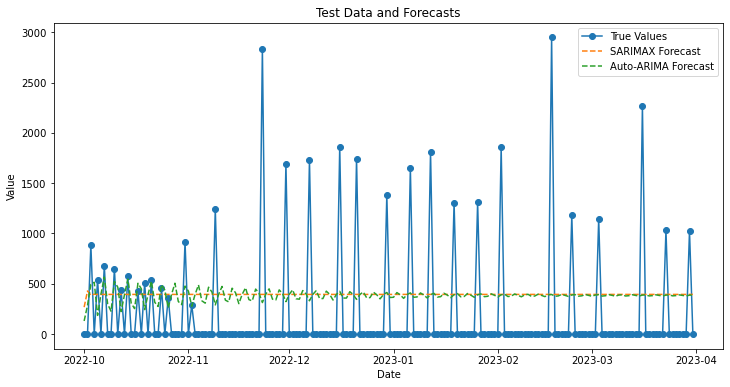

In [279]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.plot(data_train_nc.index, data_train_nc['New_cases'], label='Training Data')
plt.plot(data_train_nc.index, sarimax_fit.fittedvalues, label='SARIMAX Fit', linestyle='dashed')
plt.plot(data_train_nc.index, auto_arima_insample, label='Auto-ARIMA Fit', linestyle='dashed')
plt.legend()
plt.title('Training Data and Model Fits')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plotting the test results
plt.figure(figsize=(12, 6))
plt.plot(data_test_nc.index, data_test_nc['New_cases'], label='True Values', marker='o')
plt.plot(data_test_nc.index, sarimax_forecast, label='SARIMAX Forecast', linestyle='dashed')
plt.plot(data_test_nc.index, auto_arima_forecast, label='Auto-ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.title('Test Data and Forecasts')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [280]:
# Calculate evaluation metrics for SARIMAX model
mae_sarimax = mean_absolute_error(data_test_nc['New_cases'], sarimax_forecast)
rmse_sarimax = np.sqrt(mean_squared_error(data_test_nc['New_cases'], sarimax_forecast))
mape_sarimax = mean_absolute_percentage_error(data_test_nc['New_cases'], sarimax_forecast)

# Calculate evaluation metrics for auto-ARIMA model
mae_auto_arima = mean_absolute_error(data_test_nc['New_cases'], auto_arima_forecast)
rmse_auto_arima = np.sqrt(mean_squared_error(data_test_nc['New_cases'], auto_arima_forecast))
mape_auto_arima = mean_absolute_percentage_error(data_test_nc['New_cases'], auto_arima_forecast)
# Print the evaluation metrics
print("SARIMAX Model:")
print(f"MAE: {mae_sarimax:.2f}")
print(f"RMSE: {rmse_sarimax:.2f}")
print(f"MAPE: {mape_sarimax:.2f}%")

print("\nAuto-ARIMA Model:")
print(f"MAE: {mae_auto_arima:.2f}")
print(f"RMSE: {rmse_auto_arima:.2f}")
print(f"MAPE: {mape_auto_arima:.2f}%")


SARIMAX Model:
MAE: 465.16
RMSE: 567.49
MAPE: 1467725662537248768.00%

Auto-ARIMA Model:
MAE: 455.77
RMSE: 566.51
MAPE: 1423426042888320768.00%


Simple ES - MAE: 464.60, RMSE: 567.22, MAPE: 1464447782632186368.00%
Exp Smoothing - MAE: 531.07, RMSE: 711.00, MAPE: 1423426042888320768.00%
SARIMAX Model: MAE: 465.16 RMSE: 567.49 MAPE: 1467725662537248768.00%
Auto-ARIMA Model:MAE: 455.77 RMSE: 566.51 MAPE: 423426042888320768.00%

From the evaluation results, smaller values indicates the model work better. We can find out the overall the Auto-ARIMA Model works a little bit better in these four time series models.

## "Overall AQI Value" data

### Use SimpleExpSmoothing and ExponentialSmoothing model to do the time series analysis

(1) Decomponent

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_72806/1856560675.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2020-2023 King County daily Overall AQI Value


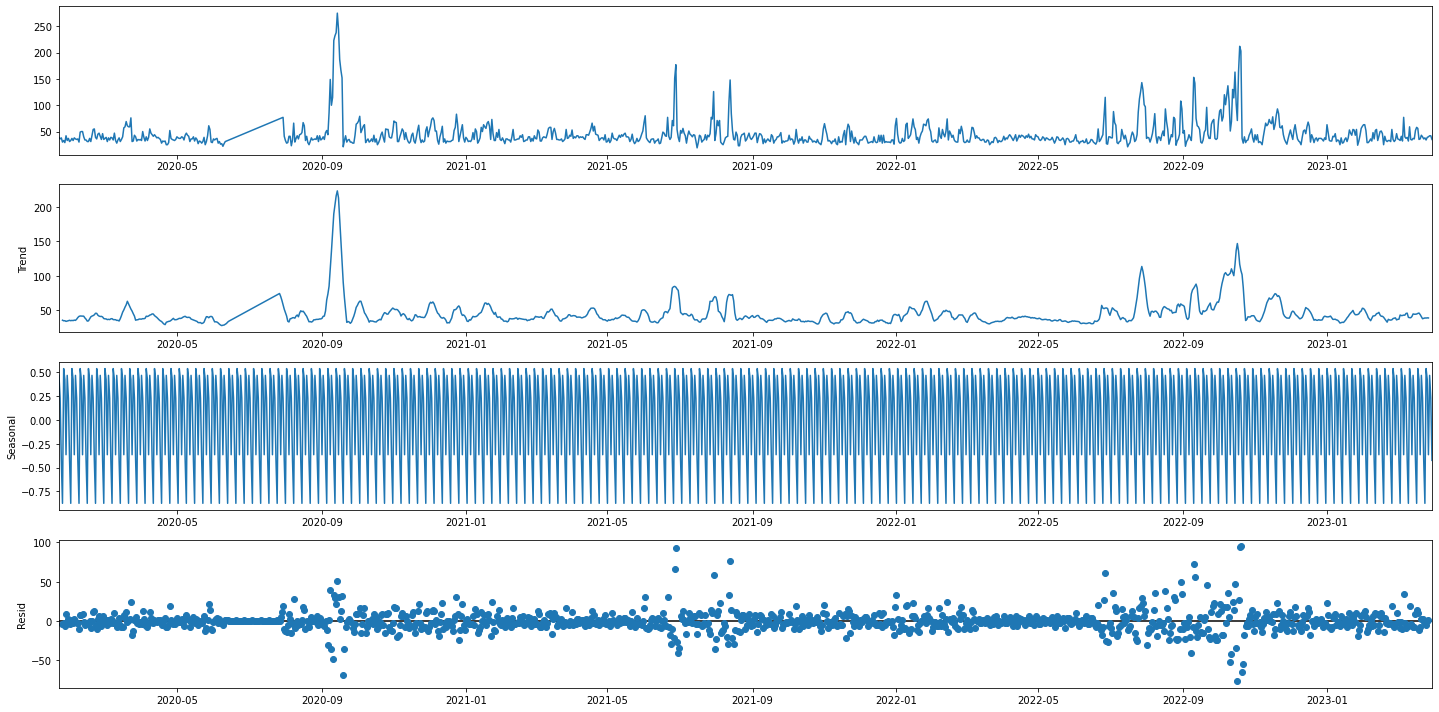

In [282]:
df_aqi = df_analysis[["Date", "Overall AQI Value"]]
df_aqi["Date"] = pd.to_datetime(df_aqi["Date"])  # Convert "Date" column to datetime
df_aqi.set_index("Date", inplace=True)  # Set "Date" column as index

# Set frequency for daily data
df_aqi = df_aqi.asfreq('D')

# Interpolate missing values
df_aqi["Overall AQI Value"] = df_aqi["Overall AQI Value"].interpolate()

aqi_decom = seasonal_decompose(df_aqi, model="additive")
plt.rcParams['figure.figsize'] = [20, 10]
print("2020-2023 King County daily Overall AQI Value")
aqi_decom.plot()
plt.show()

In [283]:
# Overall AQI Value
data_train_aqi = data_train[["Overall AQI Value"]]
data_test_aqi = data_test[["Overall AQI Value"]]

display(data_train_aqi.head())
display(data_test_aqi.head())

Overall AQI Value
Date                         
2020-01-22                 39
2020-01-23                 36
2020-01-24                 38
2020-01-25                 30
2020-01-26                 33

Overall AQI Value
Date                         
2022-10-01                 70
2022-10-02                 89
2022-10-03                 92
2022-10-04                 70
2022-10-05                 78

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Simple ES - MAE: 17.31, RMSE: 32.08, MAPE: 0.25%
Exp Smoothing - MAE: 17.25, RMSE: 31.93, MAPE: 0.25%


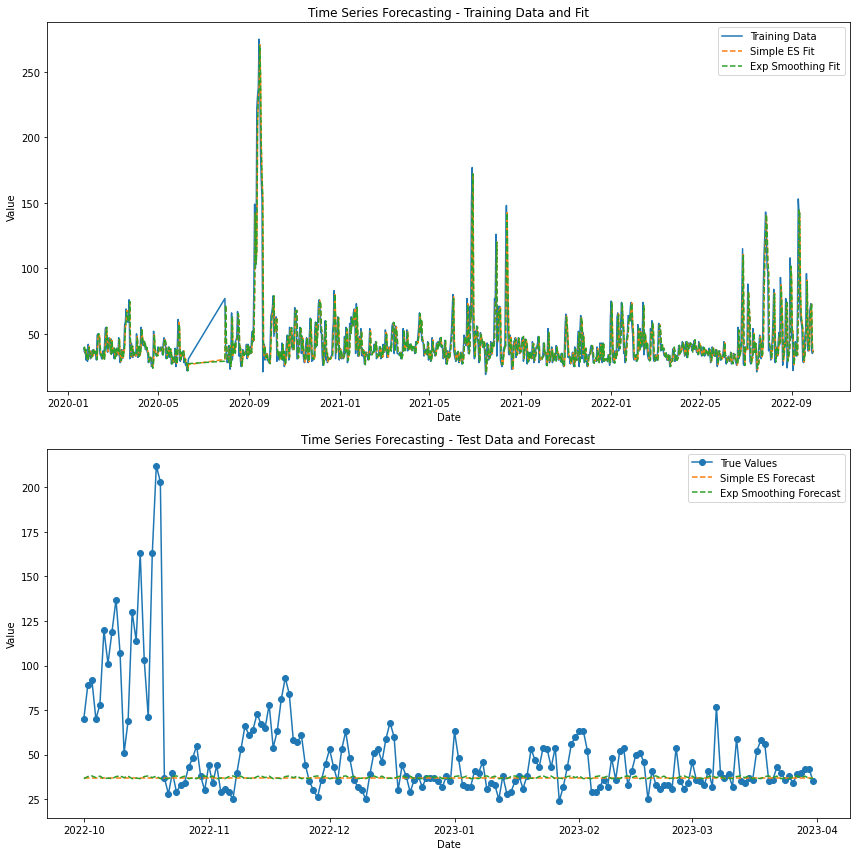

In [284]:
# Fit the models and forecast
simple_es_aqi = SimpleExpSmoothing(data_train_aqi['Overall AQI Value']).fit()
simple_es_forecast_aqi = simple_es_aqi.forecast(steps=len(data_test_aqi))

exp_smoothing_aqi = ExponentialSmoothing(data_train_aqi['Overall AQI Value'], seasonal='add', seasonal_periods=7).fit()
exp_smoothing_forecast_aqi = exp_smoothing_aqi.forecast(steps=len(data_test_aqi))

# Calculate evaluation metrics
mae_simple_es_aqi = mean_absolute_error(data_test_aqi['Overall AQI Value'], simple_es_forecast_aqi)
rmse_simple_es_aqi = np.sqrt(mean_squared_error(data_test_aqi['Overall AQI Value'], simple_es_forecast_aqi))
mape_simple_es_aqi = mean_absolute_percentage_error(data_test_aqi['Overall AQI Value'],simple_es_forecast_aqi)


mae_exp_smoothing_aqi = mean_absolute_error(data_test_aqi['Overall AQI Value'], exp_smoothing_forecast_aqi)
rmse_exp_smoothing_aqi = np.sqrt(mean_squared_error(data_test_aqi['Overall AQI Value'], exp_smoothing_forecast_aqi))
mape_exp_smoothing_aqi = mean_absolute_percentage_error(data_test_aqi['Overall AQI Value'],exp_smoothing_forecast_aqi) 

print(f"Simple ES - MAE: {mae_simple_es_aqi:.2f}, RMSE: {rmse_simple_es_aqi:.2f}, MAPE: {mape_simple_es_aqi:.2f}%")
print(f"Exp Smoothing - MAE: {mae_exp_smoothing_aqi:.2f}, RMSE: {rmse_exp_smoothing_aqi:.2f}, MAPE: {mape_exp_smoothing_aqi:.2f}%")

# Plotting the training data and fit model data
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(data_train_aqi.index, data_train_aqi['Overall AQI Value'], label='Training Data')
plt.plot(data_train_aqi.index, simple_es_aqi.fittedvalues, label='Simple ES Fit', linestyle='dashed')
plt.plot(data_train_aqi.index, exp_smoothing_aqi.fittedvalues, label='Exp Smoothing Fit', linestyle='dashed')
plt.legend()
plt.title('Time Series Forecasting - Training Data and Fit')
plt.xlabel('Date')
plt.ylabel('Value')

# Plotting the test data and forecasted values
plt.subplot(2, 1, 2)
plt.plot(data_test_aqi.index, data_test_aqi['Overall AQI Value'], label='True Values', marker='o')
plt.plot(data_test_aqi.index, simple_es_forecast_aqi, label='Simple ES Forecast', linestyle='dashed')
plt.plot(data_test_aqi.index, exp_smoothing_forecast_aqi, label='Exp Smoothing Forecast', linestyle='dashed')
plt.legend()
plt.title('Time Series Forecasting - Test Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

ARIMA model

In [285]:
# Fit SARIMAX model 
order = (1, 1, 1)  # Specify the order of SARIMA (p, d, q)
sarimax_model_aqi = SARIMAX(data_train_aqi['Overall AQI Value'], order=order)
sarimax_fit_aqi = sarimax_model_aqi.fit(disp=0)
sarimax_forecast_aqi = sarimax_fit_aqi.forecast(steps=len(data_test_nc))

# Fit auto-ARIMA model
auto_arima_model_aqi = auto_arima(data_train_aqi['Overall AQI Value'], seasonal=False, suppress_warnings=True)
auto_arima_insample_aqi = auto_arima_model_aqi.predict_in_sample()
auto_arima_forecast_aqi = auto_arima_model_aqi.predict(n_periods=len(data_test_aqi))

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/xiexiaoyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid

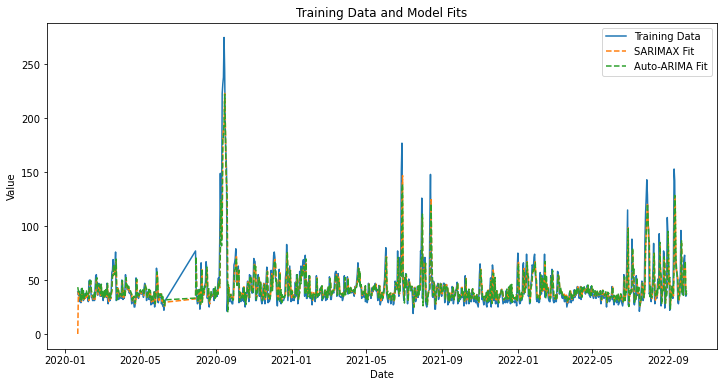

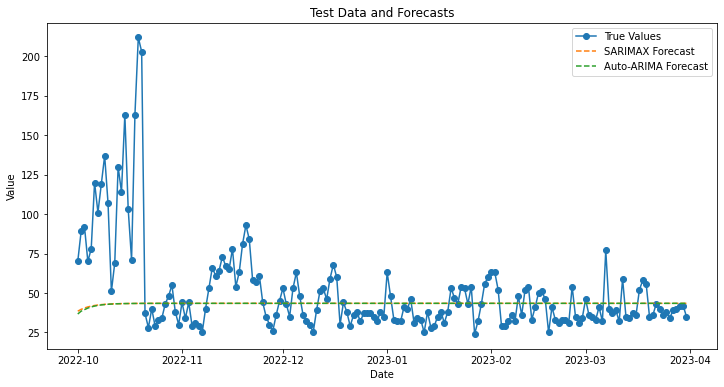

In [286]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.plot(data_train_aqi.index, data_train_aqi['Overall AQI Value'], label='Training Data')
plt.plot(data_train_aqi.index, sarimax_fit_aqi.fittedvalues, label='SARIMAX Fit', linestyle='dashed')
plt.plot(data_train_aqi.index, auto_arima_insample_aqi, label='Auto-ARIMA Fit', linestyle='dashed')
plt.legend()
plt.title('Training Data and Model Fits')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plotting the test results
plt.figure(figsize=(12, 6))
plt.plot(data_test_aqi.index, data_test_aqi['Overall AQI Value'], label='True Values', marker='o')
plt.plot(data_test_aqi.index, sarimax_forecast_aqi, label='SARIMAX Forecast', linestyle='dashed')
plt.plot(data_test_aqi.index, auto_arima_forecast_aqi, label='Auto-ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.title('Test Data and Forecasts')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [287]:
# Calculate evaluation metrics for SARIMAX model
mae_sarimax_aqi = mean_absolute_error(data_test_aqi['Overall AQI Value'], sarimax_forecast_aqi)
rmse_sarimax_aqi = np.sqrt(mean_squared_error(data_test_aqi['Overall AQI Value'], sarimax_forecast_aqi))
mape_sarimax_aqi = mean_absolute_percentage_error(data_test_aqi['Overall AQI Value'], sarimax_forecast_aqi) 

# Calculate evaluation metrics for auto-ARIMA model
mae_auto_arima_aqi = mean_absolute_error(data_test_aqi['Overall AQI Value'], auto_arima_forecast_aqi)
rmse_auto_arima_aqi = np.sqrt(mean_squared_error(data_test_aqi['Overall AQI Value'], auto_arima_forecast_aqi))
#mape_auto_arima_aqi = np.mean(np.abs((data_test_aqi['Overall AQI Value'] - auto_arima_forecast_aqi) / data_test_aqi['Overall AQI Value']) * 100)
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'data_test_aqi' is your DataFrame and 'auto_arima_forecast_aqi' is the forecasted values
mape_auto_arima_aqi = mean_absolute_percentage_error(data_test_aqi['Overall AQI Value'], auto_arima_forecast_aqi)
# Print the evaluation metrics
print("SARIMAX Model:")
print(f"MAE: {mae_sarimax_aqi:.2f}")
print(f"RMSE: {rmse_sarimax_aqi:.2f}")
print(f"MAPE: {mape_sarimax_aqi:.2f}%")

print("\nAuto-ARIMA Model:")
print(f"MAE: {mae_auto_arima_aqi:.2f}")
print(f"RMSE: {rmse_auto_arima_aqi:.2f}")
print(f"MAPE: {mape_auto_arima_aqi:.2f}%")

SARIMAX Model:
MAE: 17.20
RMSE: 30.05
MAPE: 0.29%

Auto-ARIMA Model:
MAE: 17.24
RMSE: 30.11
MAPE: 0.29%


Simple ES: MAE: 17.31, RMSE: 32.08, MAPE: 0.25%
Exp Smoothing: MAE: 17.25, RMSE: 31.93, MAPE: 0.25%
SARIMAX Model: MAE: 17.20 RMSE: 30.05 MAPE: 0.29%
Auto-ARIMA Model: MAE: 17.24 RMSE: 30.11 MAPE: 0.29%

From the evaluation result, we can find out that the SARIMAX Model works better in these four models.

In [288]:
df_analysis['New_cases']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
1160       0.0
1161       0.0
1162       0.0
1163    1023.0
1164       0.0
Name: New_cases, Length: 1117, dtype: float64

Additional Factors:

Remember that other factors, such as public health interventions, population density, testing capacity, and vaccination rates, can also influence COVID-19 case numbers.


In [289]:
# Function to map values to categories
def map_to_category(value):
    if value < 100000:
        return 0
    elif 100000 <= value <= 300000:
        return 1
    else:
        return 2

# Create a new column "Category" based on "Daily_Record"
df_analysis['record_catogery'] = df_analysis['Daily_Record'].apply(map_to_category)

print(df_analysis.tail(10))

           Date  Daily_Record  DAILY_AQI_VALUE_CO  DAILY_AQI_VALUE_NO2  \
1155 2023-03-22        552130                 6.0                   37   
1156 2023-03-23        553161                 5.0                   21   
1157 2023-03-24        553161                 5.0                   27   
1158 2023-03-25        553161                 5.0                   16   
1159 2023-03-26        553161                 5.0                   11   
1160 2023-03-27        553161                 3.0                   18   
1161 2023-03-28        553161                 2.0                   15   
1162 2023-03-29        553161                 6.0                   42   
1163 2023-03-30        554184                 6.0                   25   
1164 2023-03-31        554184                 3.0                   21   

      DAILY_AQI_VALUE_ozone  DAILY_AQI_VALUE_PM2.5  DAILY_AQI_VALUE_SO2  \
1155                   34.0                     16                  0.0   
1156                   40.0        

<AxesSubplot:>

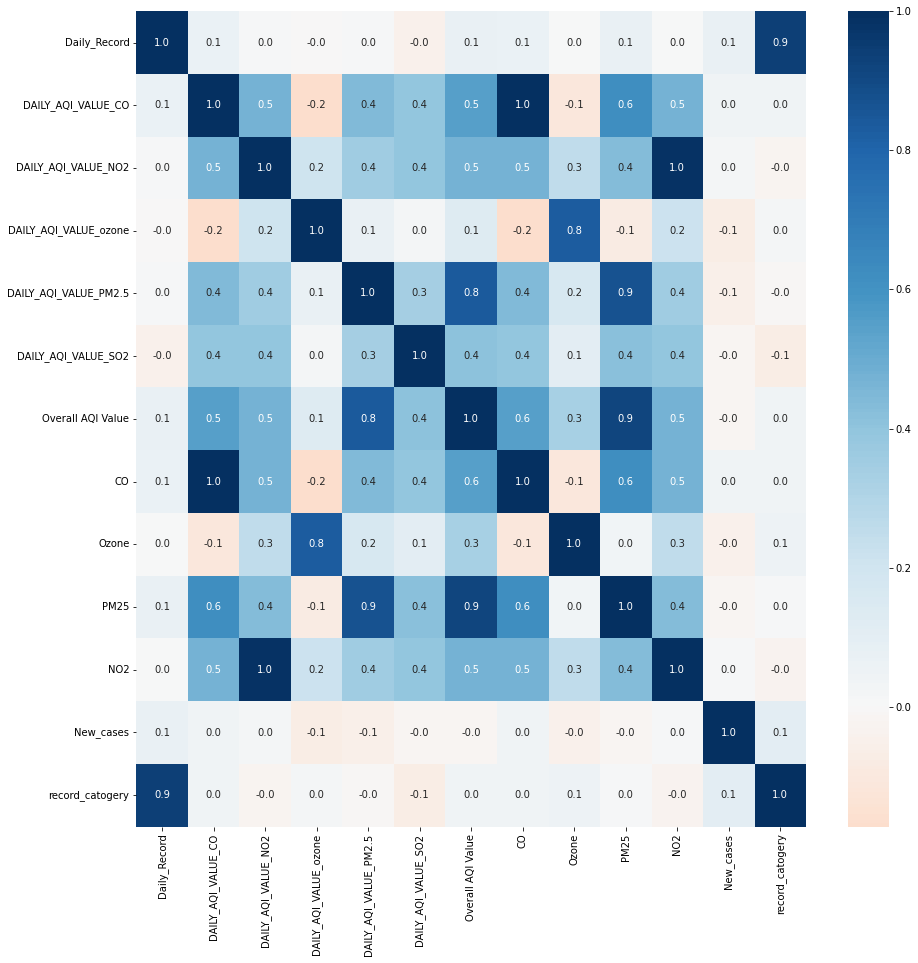

In [290]:
corr = df_analysis.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0,ax=ax)